# Predicting the damage to a Building!

**Imports**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize']=(15,8)

In [4]:
train = pd.read_csv('train.csv')
train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


In [5]:
train.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'district_id',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id'],
      dtype='object')

**Reading building structure and ownership csv's and merging with train/test csvs**

In [6]:
bs = pd.read_csv('Building_Structure.csv')
bs.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear


In [7]:
bo = pd.read_csv('Building_Ownership_Use.csv')
bo.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [8]:
building = pd.merge(bs, bo, on='building_id')
building.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(bo.shape)
print(bs.shape)
print(building.shape)

(1052948, 17)
(1052948, 29)
(1052948, 45)


In [10]:
train.shape

(631761, 14)

In [11]:
test = pd.read_csv('test.csv')
test.head()

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701


In [12]:
test.shape

(421175, 13)

In [13]:
train = pd.merge(train, building, on='building_id')

In [14]:
test = pd.merge(test, building, on='building_id')

In [15]:
train.shape

(631761, 58)

In [16]:
test.shape

(421175, 57)

In [17]:
train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'district_id',
       'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
       'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'vdcmun_id', 'district_id_x', 'vdcmun_id_x',
       'ward_id_x', 'count_floors_pre_eq', 'count_floors_post_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'height_ft_post_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_bri

fuck, too many features, let's start analysing them... But wait let's first check the data NaN

In [19]:
train.describe()

,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,598344.000000,...,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000
mean,26.831720,0.123920,0.042708,0.009263,0.034602,0.069629,0.002319,0.001061,0.034853,0.316076,...,0.063974,0.034182,0.008391,0.000972,0.000397,0.001103,0.000203,0.000150,0.000089,0.005041
std,7.771394,0.329491,0.202197,0.095798,0.182769,0.254521,0.048099,0.032548,0.183408,0.464943,...,0.244706,0.181697,0.091216,0.031160,0.019928,0.033197,0.014233,0.012262,0.009415,0.070824
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 58 columns):
area_assesed                              631761 non-null object
building_id                               631761 non-null object
damage_grade                              631761 non-null object
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null float64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_other               631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        598344 non-null float64
vdcmun_id                                 631761 n

First let's clear our data that is drop off any duplicates if present!

In [21]:
train.duplicated().sum()

0

DistrictId, building id are now not needed, but we'll delete them soon after making some visualisations and some pivot tables

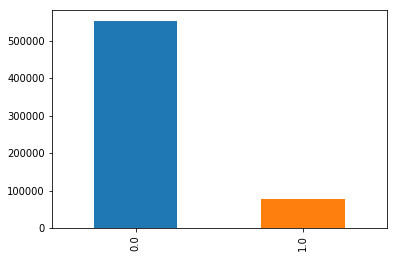

In [22]:
train['has_geotechnical_risk'].value_counts().plot(kind='bar')

Too many zeros, but this feature has important role in predicting about damage via earthquake, if I am right values with '1' will must have signigicantly larger affect on higher damage; Let's check via making a pivot table

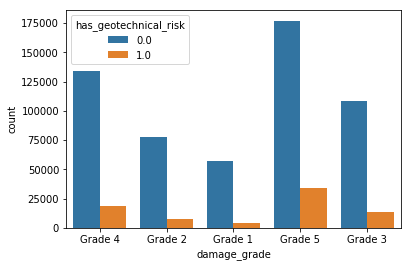

In [25]:
sns.countplot(x='damage_grade', hue='has_geotechnical_risk', data=train)

By the above plot we can see that Grade 5 has more number of 1's that is prone to geotechnical risk, grade 1 is least prone but, one thing to note we have more example of (0)'s then one's here. <br>
OR <br> we can say that this is not a deciding factor

Let's quicky analyse all these has_bla_bla features

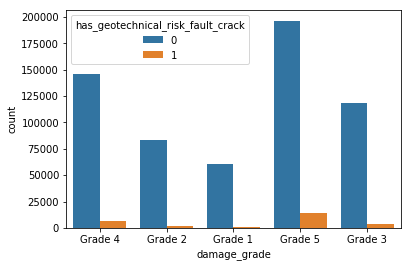

In [26]:
sns.countplot(x='damage_grade', hue='has_geotechnical_risk_fault_crack', data=train)

C:\Users\Aadi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


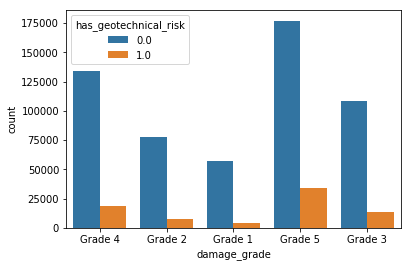

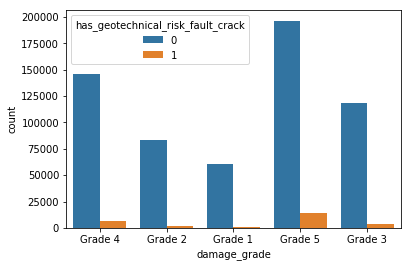

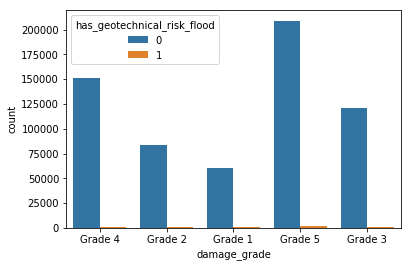

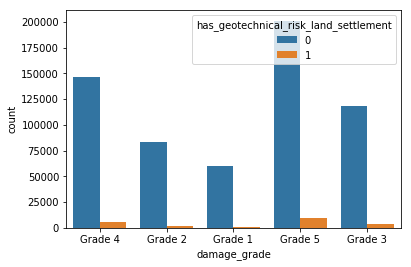

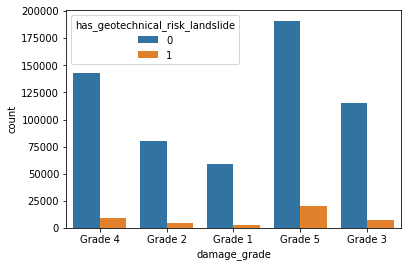

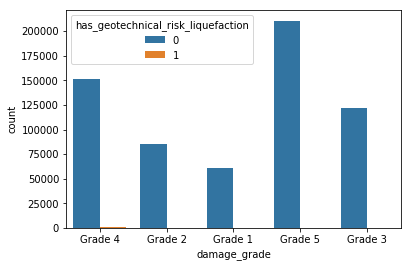

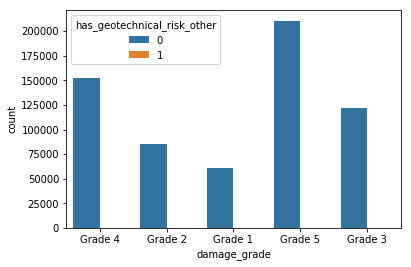

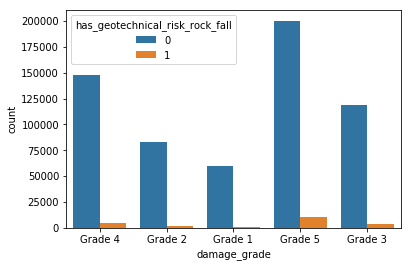

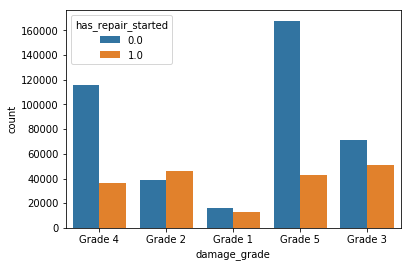

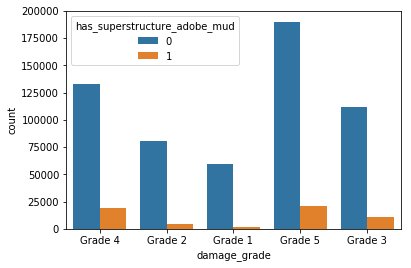

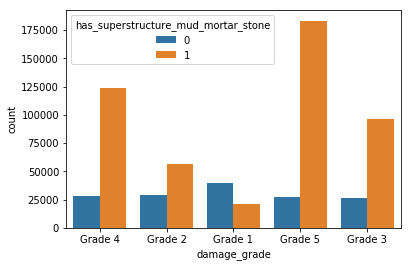

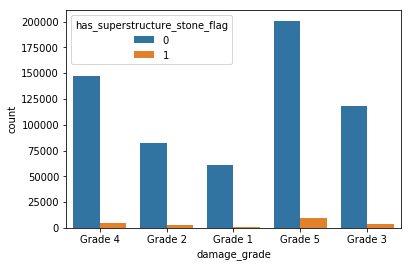

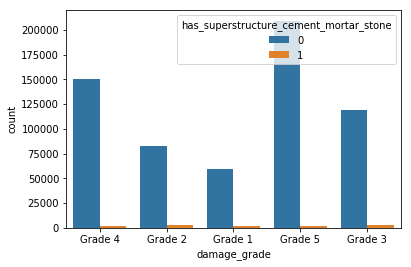

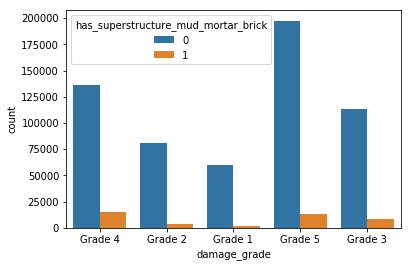

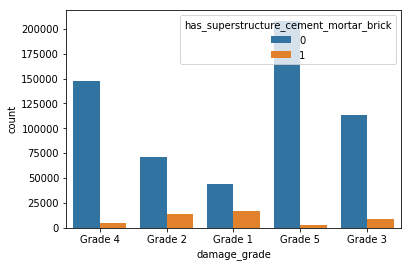

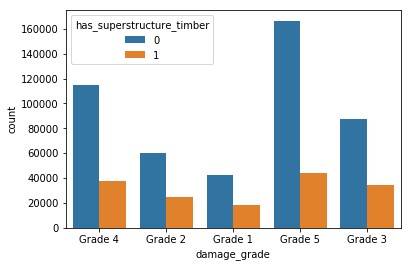

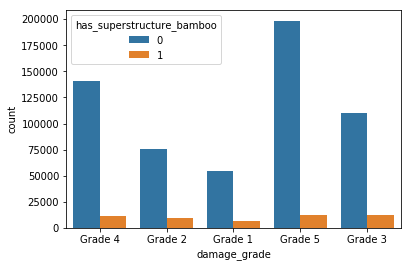

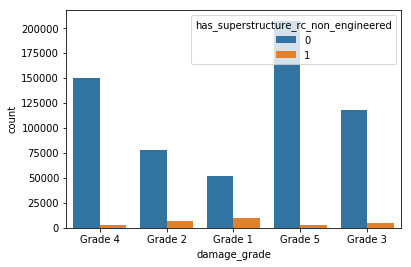

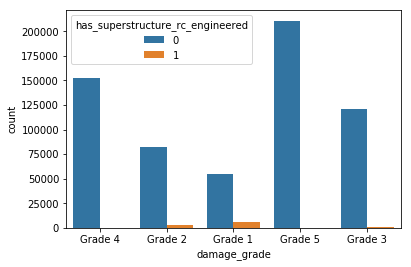

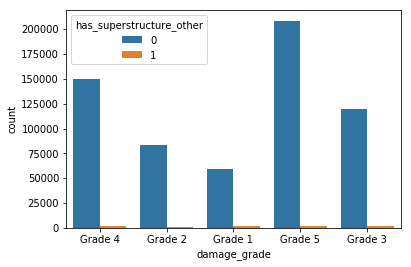

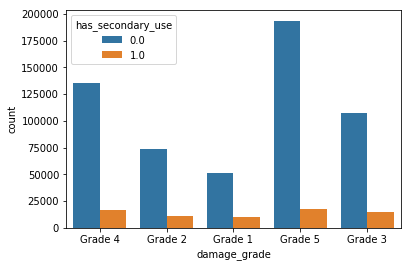

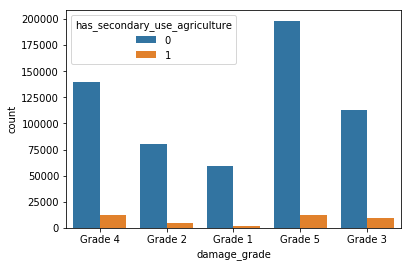

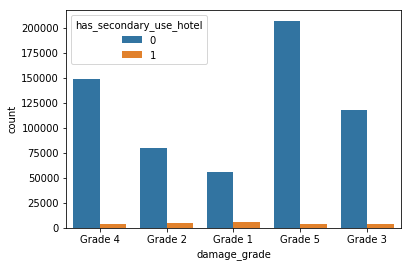

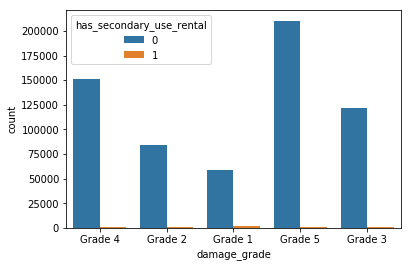

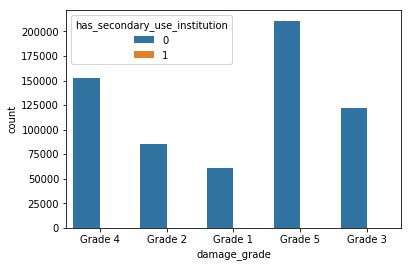

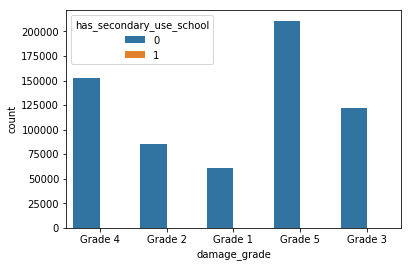

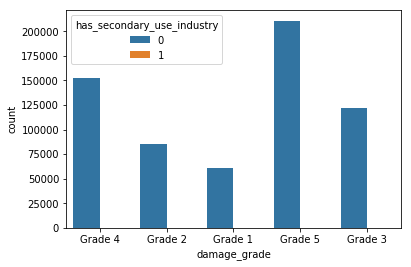

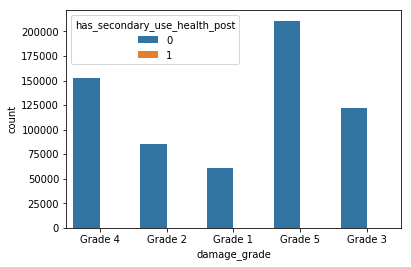

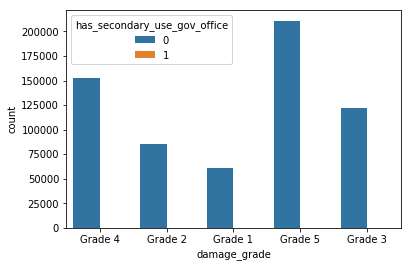

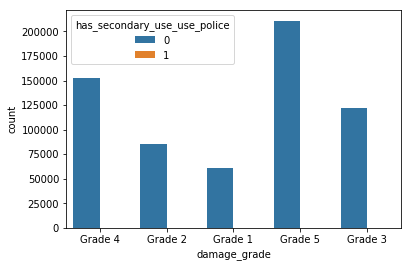

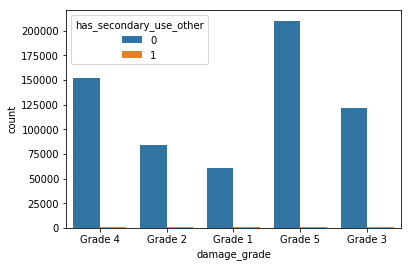

<Figure size 432x288 with 0 Axes>

In [27]:
for col in train.columns.tolist():
    if 'has' in col:
        sns.countplot(x='damage_grade', hue=col, data=train)
        fig = plt.figure()

Whoa! after these sooooo many images we can easily see that there are so many useless features which if ignored will surely be the pain in ass when our model would not be predicting accurately! <br> <b> Let's remove these fucking features </B>

In [28]:
[col for col in train.columns.tolist() if 'has' in col]

['has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_risk_rock_fall',
 'has_repair_started',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_us

 Doubtful Features, we may look back at these...'has_geotechnical_risk_rock_fall', 'has_superstructure_stone_flag'

In [30]:
train.drop(['has_geotechnical_risk_fault_crack','has_geotechnical_risk_flood', 'has_geotechnical_risk_liquefaction',
            'has_geotechnical_risk_other', 'has_geotechnical_risk_land_settlement', 'has_geotechnical_risk_liquefaction',
            'has_geotechnical_risk_other', 'has_superstructure_cement_mortar_stone','has_superstructure_bamboo',
            'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use_hotel', 
            'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 
            'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
            'has_secondary_use_use_police','has_secondary_use_other',], axis=1, inplace=True)

Now that we have deleted so many 'has', let's see those graphs again and delete the feature which has remained, by mistake!

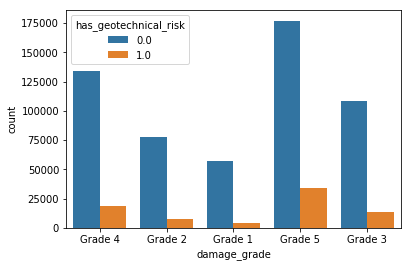

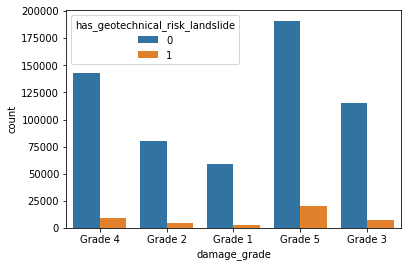

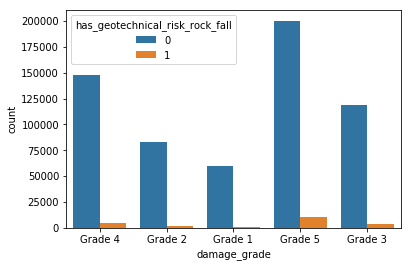

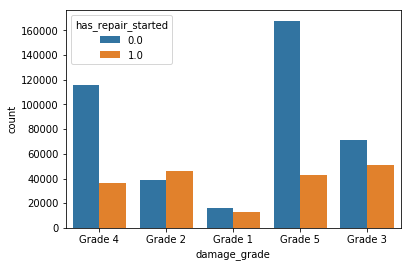

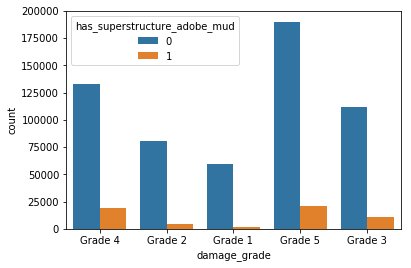

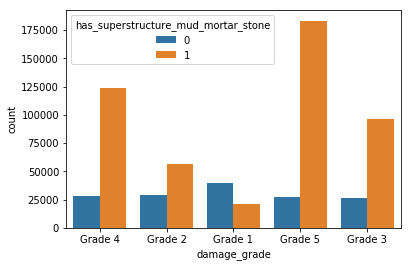

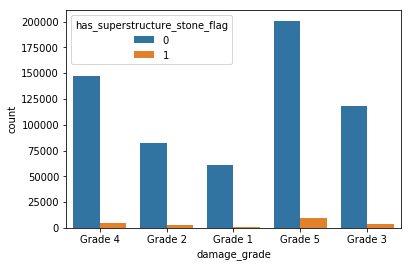

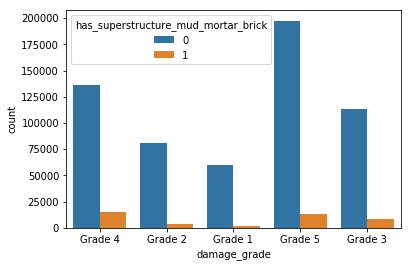

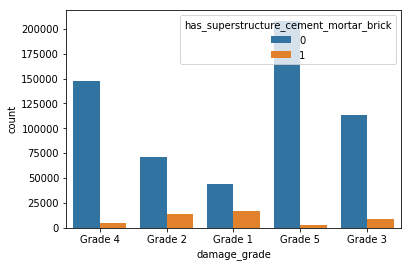

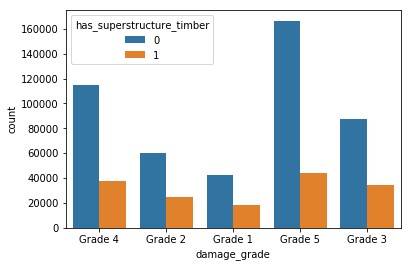

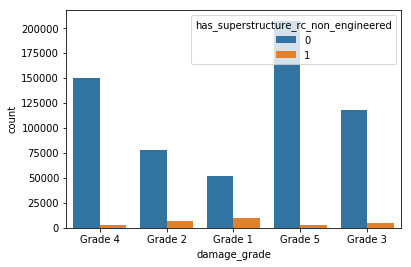

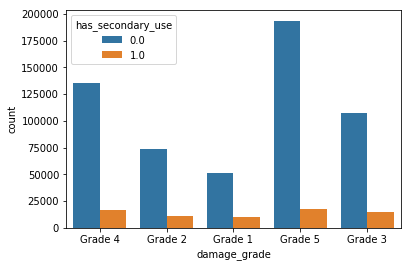

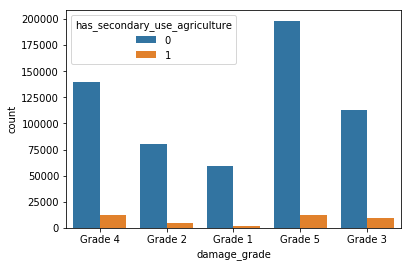

<Figure size 432x288 with 0 Axes>

In [31]:
for col in train.columns.tolist():
    if 'has' in col:
        sns.countplot(x='damage_grade', hue=col, data=train)
        fig = plt.figure()

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 40 columns):
area_assesed                              631761 non-null object
building_id                               631761 non-null object
damage_grade                              631761 non-null object
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null float64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        598344 non-null float64
vdcmun_id                                 631761 non-null int64
district_id_x                             631761 non-null int64
vdcmun_id_x                               631761 non-null int64
ward_id_x                                 631761 non-null int64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 n

In [35]:
for i, v in enumerate(train.columns.tolist()):
    print(i, v)

0 area_assesed
1 building_id
2 damage_grade
3 district_id
4 has_geotechnical_risk
5 has_geotechnical_risk_landslide
6 has_geotechnical_risk_rock_fall
7 has_repair_started
8 vdcmun_id
9 district_id_x
10 vdcmun_id_x
11 ward_id_x
12 count_floors_pre_eq
13 count_floors_post_eq
14 age_building
15 plinth_area_sq_ft
16 height_ft_pre_eq
17 height_ft_post_eq
18 land_surface_condition
19 foundation_type
20 roof_type
21 ground_floor_type
22 other_floor_type
23 position
24 plan_configuration
25 has_superstructure_adobe_mud
26 has_superstructure_mud_mortar_stone
27 has_superstructure_stone_flag
28 has_superstructure_mud_mortar_brick
29 has_superstructure_cement_mortar_brick
30 has_superstructure_timber
31 has_superstructure_rc_non_engineered
32 condition_post_eq
33 district_id_y
34 vdcmun_id_y
35 ward_id_y
36 legal_ownership_status
37 count_families
38 has_secondary_use
39 has_secondary_use_agriculture


Now let's delete some of the features which are not of much use.. [experimental] <br> So, Let's make another df

In [36]:
features = train.iloc[:, np.r_[0:3, 4:8, 12:33, 38, 39]]

Now, we'll be working on features and will remove those featurs which are going to create a mess.

In [37]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 30 columns):
area_assesed                              631761 non-null object
building_id                               631761 non-null object
damage_grade                              631761 non-null object
has_geotechnical_risk                     631761 non-null float64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        598344 non-null float64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 non-null int64
age_building                              631761 non-null int64
plinth_area_sq_ft                         631761 non-null int64
height_ft_pre_eq                          631761 non-null int64
height_ft_post_eq                         631761 non-null int64
land_surface_condition                    631761 n

Now we have to see the affects of area_assesed, count_floors, age, plinth area, height, land_surface_condn, foundation, roof type, gf type, position, plan configuration on dmage_grade!

Since we need numeical values to analyse data, so let's convert them into numerical values, using LabelEncoder <br>

In [38]:
for i, v in enumerate(features.columns.tolist()):
    print(i, v)

0 area_assesed
1 building_id
2 damage_grade
3 has_geotechnical_risk
4 has_geotechnical_risk_landslide
5 has_geotechnical_risk_rock_fall
6 has_repair_started
7 count_floors_pre_eq
8 count_floors_post_eq
9 age_building
10 plinth_area_sq_ft
11 height_ft_pre_eq
12 height_ft_post_eq
13 land_surface_condition
14 foundation_type
15 roof_type
16 ground_floor_type
17 other_floor_type
18 position
19 plan_configuration
20 has_superstructure_adobe_mud
21 has_superstructure_mud_mortar_stone
22 has_superstructure_stone_flag
23 has_superstructure_mud_mortar_brick
24 has_superstructure_cement_mortar_brick
25 has_superstructure_timber
26 has_superstructure_rc_non_engineered
27 condition_post_eq
28 has_secondary_use
29 has_secondary_use_agriculture


In [39]:
from sklearn.preprocessing import LabelEncoder
obj_vars = features.iloc[:,np.r_[0, 13:20, 27]]
objToNumCat = obj_vars.apply(LabelEncoder().fit_transform)
features.iloc[:, np.r_[0, 13:20, 27]] = objToNumCat

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [40]:
# doing separately for label.
def repl(a):
    if '1' in a:
        return 0
    elif '2' in a:
        return 1
    elif '3' in a:
        return 2
    elif '4' in a:
        return 3
    else:
        return 4

features['damage_grade'] = features['damage_grade'].apply(lambda x: repl(x))

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now, there is no object dype, all are int or float

In [41]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 30 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null int64
has_geotechnical_risk                     631761 non-null float64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        598344 non-null float64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 non-null int64
age_building                              631761 non-null int64
plinth_area_sq_ft                         631761 non-null int64
height_ft_pre_eq                          631761 non-null int64
height_ft_post_eq                         631761 non-null int64
land_surface_condition                    631761 non

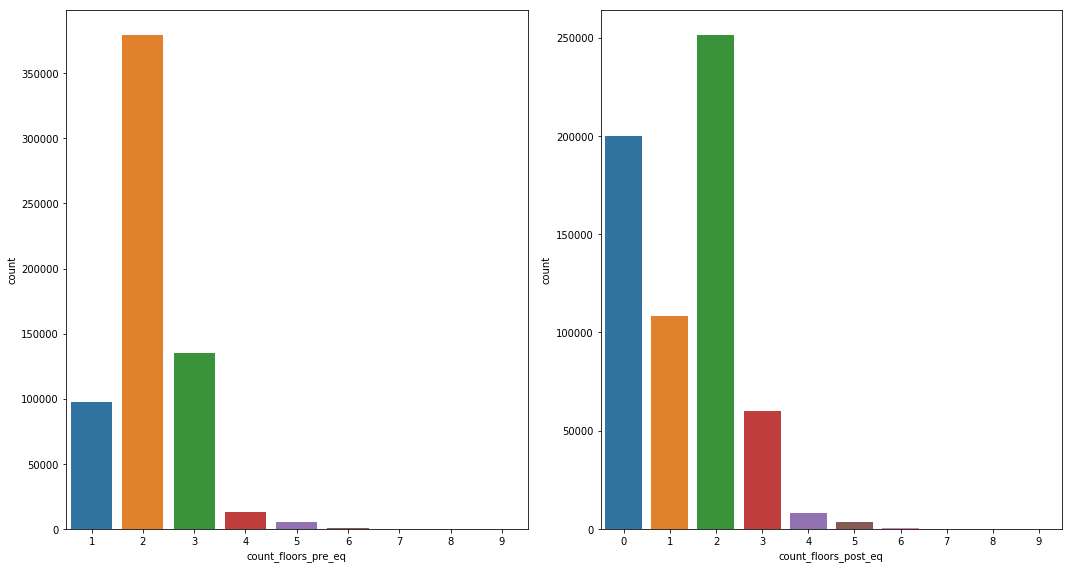

In [42]:
plt.rcParams['figure.figsize']=(15, 8)
fig, ax = plt.subplots(ncols=2, nrows=1)
sns.countplot(x='count_floors_pre_eq', data=features, ax=ax[0])
sns.countplot(x='count_floors_post_eq', data=features, ax=ax[1])
plt.tight_layout()

There were no 0 floors before but after earthquake there are, this can be easily understood since that floor must have been fallen, but since number of (0) floors are much more, this implies their is high grade damage...
<br> So, let's quickly analyse count_floors_post_eq with damage_grade by making a boxplot

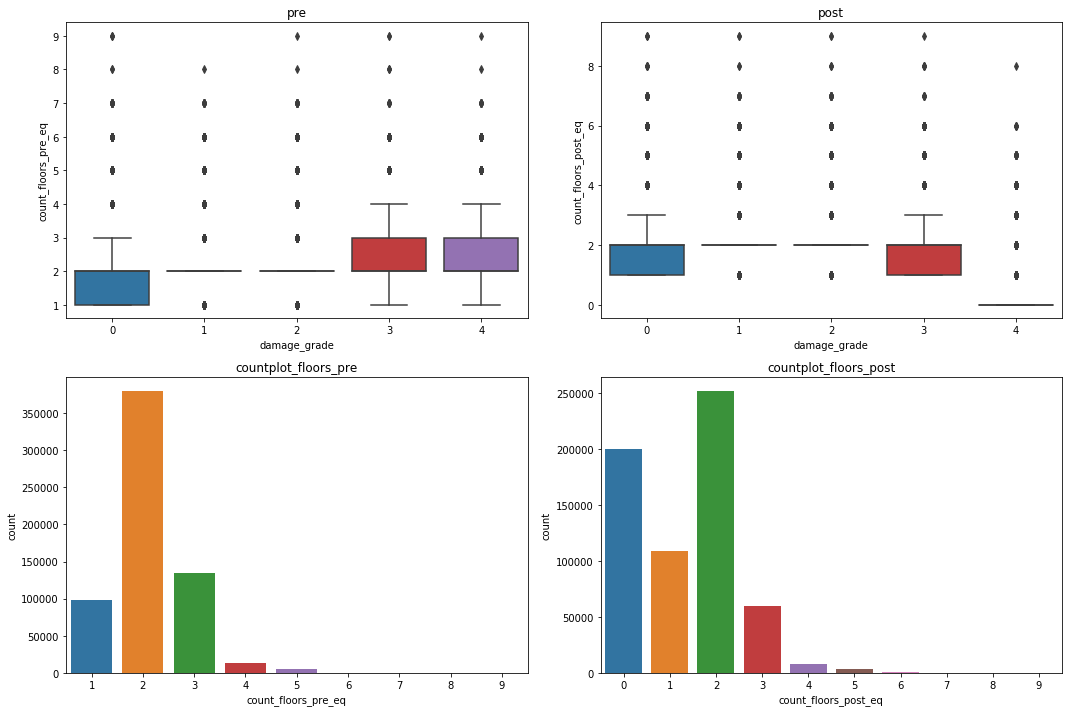

In [43]:
plt.rcParams['figure.figsize']=(15,10)
f, ax = plt.subplots(ncols=2, nrows=2)
sns.boxplot(x='damage_grade', y='count_floors_pre_eq', data=features, ax=ax[0][0])
ax[0][0].set_title('pre')
sns.boxplot(x='damage_grade', y='count_floors_post_eq', data=features, ax=ax[0][1])
ax[0][1].set_title('post')
sns.countplot(x='count_floors_pre_eq', data=features, ax=ax[1][0])
ax[1][0].set_title('countplot_floors_pre')
sns.countplot(x='count_floors_post_eq', data=features, ax=ax[1][1])
ax[1][1].set_title('countplot_floors_post')
plt.tight_layout()

We have so many outliers, let's delete the observations where floors are above 5

In [44]:
idcollist = features[(features['count_floors_pre_eq']>=6 )| (features['count_floors_post_eq']>=6 )]['building_id'].tolist()
len(idcollist)
for id in idcollist:
    features.drop(features[features['building_id']==id].index, inplace=True)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Let's check the box plot once again...

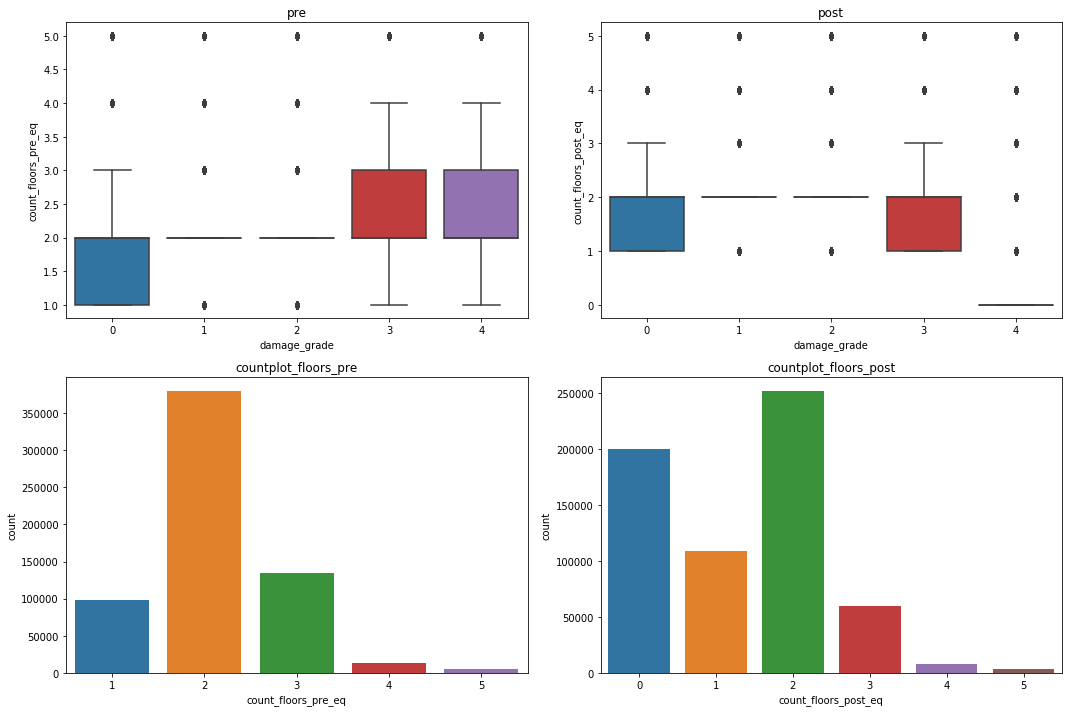

In [45]:
f, ax = plt.subplots(ncols=2, nrows=2)
sns.boxplot(x='damage_grade', y='count_floors_pre_eq', data=features, ax=ax[0][0])
ax[0][0].set_title('pre')
sns.boxplot(x='damage_grade', y='count_floors_post_eq', data=features, ax=ax[0][1])
ax[0][1].set_title('post')
sns.countplot(x='count_floors_pre_eq', data=features, ax=ax[1][0])
ax[1][0].set_title('countplot_floors_pre')
sns.countplot(x='count_floors_post_eq', data=features, ax=ax[1][1])
ax[1][1].set_title('countplot_floors_post')
plt.tight_layout()

Let's see the boxplot between age of building and damage_grade

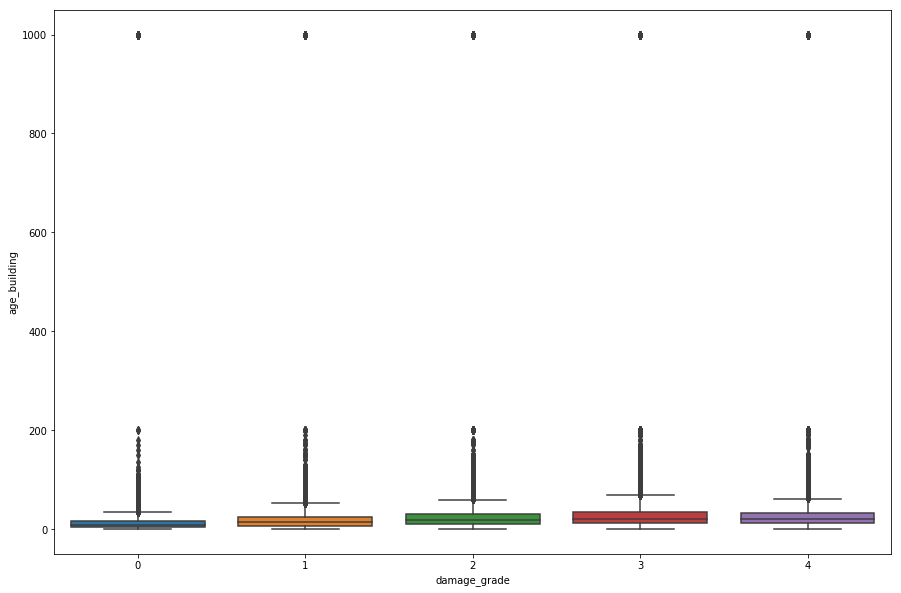

In [46]:
sns.boxplot(x='damage_grade', y='age_building', data=features)

We can see there is an outlier, let's delete that outlier(s)

In [47]:
bid_list = features[features['age_building']==999]['building_id'].tolist()
for bid in bid_list:
    features.drop(features[features['building_id'] == bid].index, inplace=True)
#     features = features.drop(features[features['building_id']==bid].index)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Let's visualize the boxplot again!, re running prevous block..

In [48]:
plt.rcParams['figure.figsize']=(15, 8)

Let's see the age boxplot again, re-running the plot(one that is above the previous cell)

Next, plinth_area_sq_fit;

C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


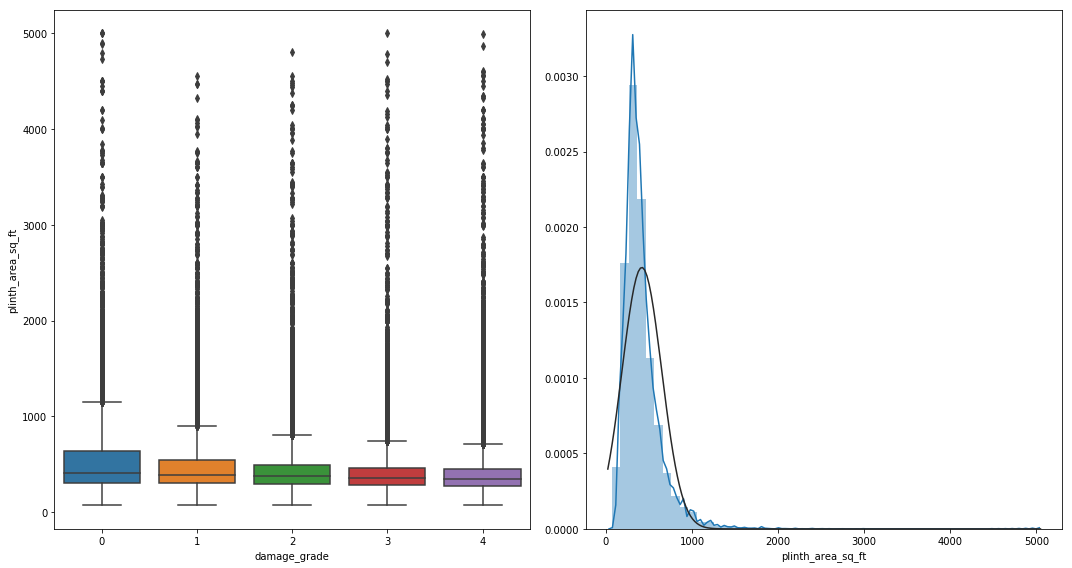

In [49]:
f, ax = plt.subplots(ncols=2, nrows=1)
sns.boxplot(x='damage_grade', y='plinth_area_sq_ft', data=features, ax=ax[0])
sns.distplot(features['plinth_area_sq_ft'], ax=ax[1], fit=norm)
plt.tight_layout()

In [50]:
print('Skewness of plinth_area_sq_ft', features['plinth_area_sq_ft'].skew())

Skewness of plinth_area_sq_ft 3.5699482766083483


It is positive skewed, let's take log

In [51]:
features['plinth_area_normal'] = np.log(features['plinth_area_sq_ft'])

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


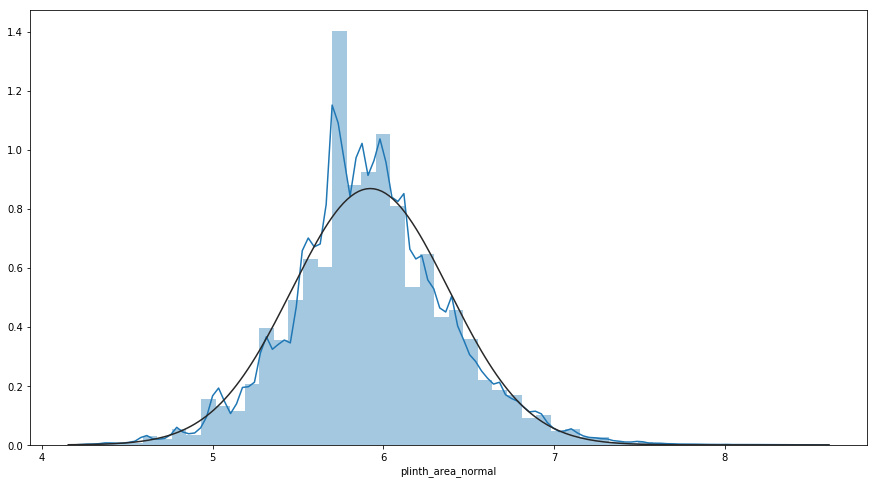

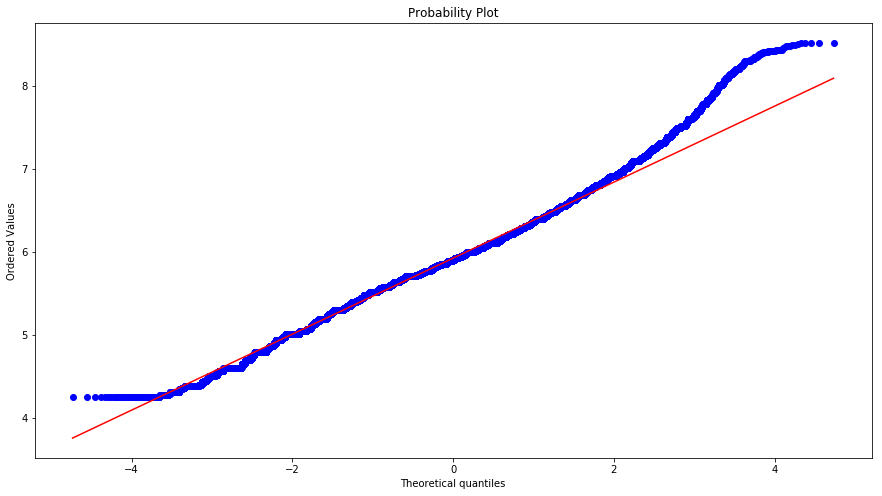

In [52]:
sns.distplot(features['plinth_area_normal'], fit=norm)
fig = plt.figure()
res = stats.probplot(features['plinth_area_normal'], plot=plt);

Okay, plinth is now set, let's work on height now!

C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


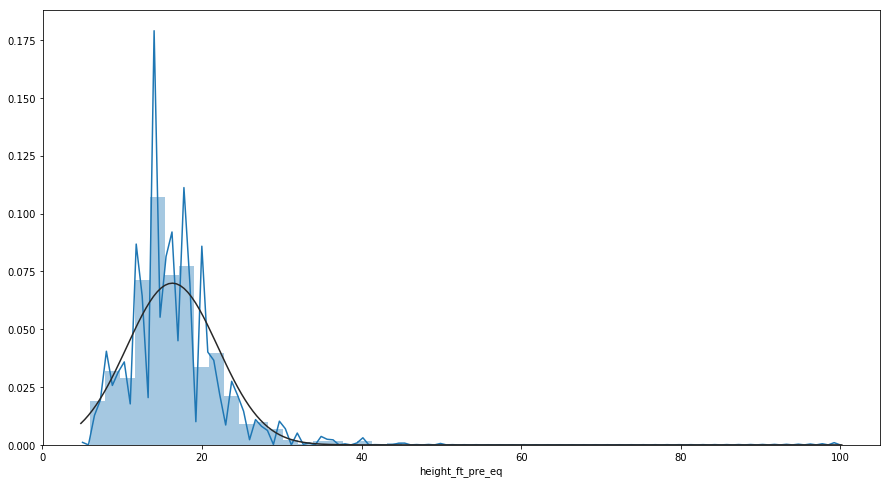

In [53]:
sns.distplot(features['height_ft_pre_eq'], fit=norm)

There must be an outlier in height, let's find that shitty outlier

In [54]:
features['height_ft_pre_eq'].describe()

count    627881.000000
mean         16.277793
std           5.705308
min           6.000000
25%          13.000000
50%          16.000000
75%          19.000000
max          99.000000
Name: height_ft_pre_eq, dtype: float64

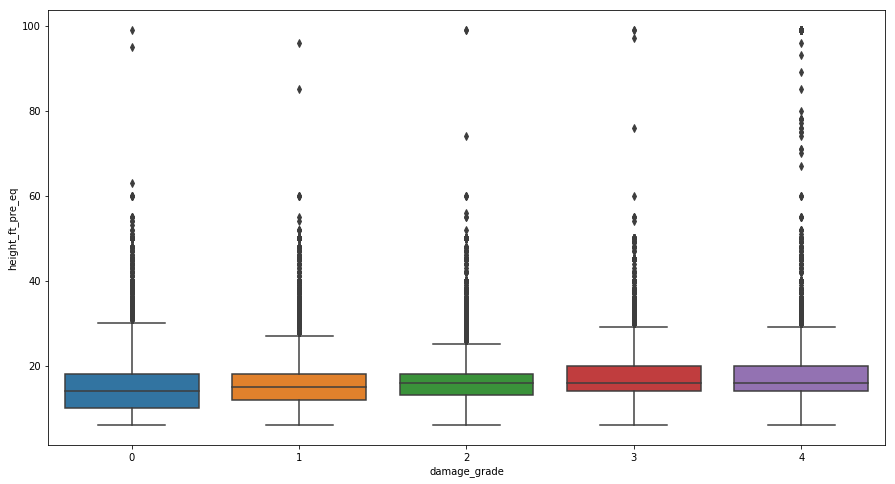

In [55]:
sns.boxplot(x='damage_grade', y='height_ft_pre_eq', data=features)

Let's delete height above 80 then we'll adapt accodingly to our model.

In [56]:
temp_list = features[features['height_ft_pre_eq'] >=60]['building_id'].tolist()
for id in temp_list:
    features.drop(features[features['building_id'] == id].index, inplace=True)   

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Now, let's again make the boxplot and distplot

C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


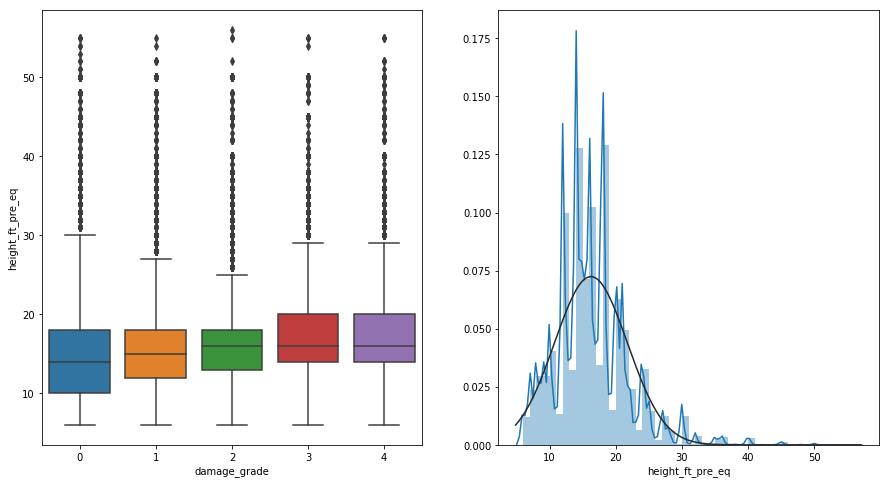

In [57]:
f, ax = plt.subplots(ncols=2, nrows=1)
sns.boxplot(x='damage_grade', y='height_ft_pre_eq', data=features, ax=ax[0])
sns.distplot(features['height_ft_pre_eq'], fit=norm, ax=ax[1])

[This is experimental] we can include this in our model, Trying...

C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


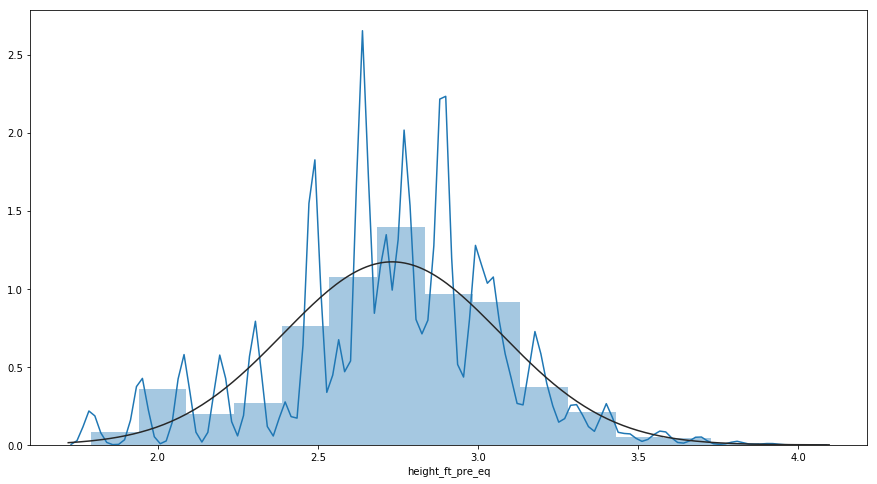

In [58]:
log_pre_ht = np.log(features['height_ft_pre_eq'])
sns.distplot(log_pre_ht, fit=norm, bins=15)

In [59]:
features['height_pre_normal'] = log_pre_ht

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


for height post eq


C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


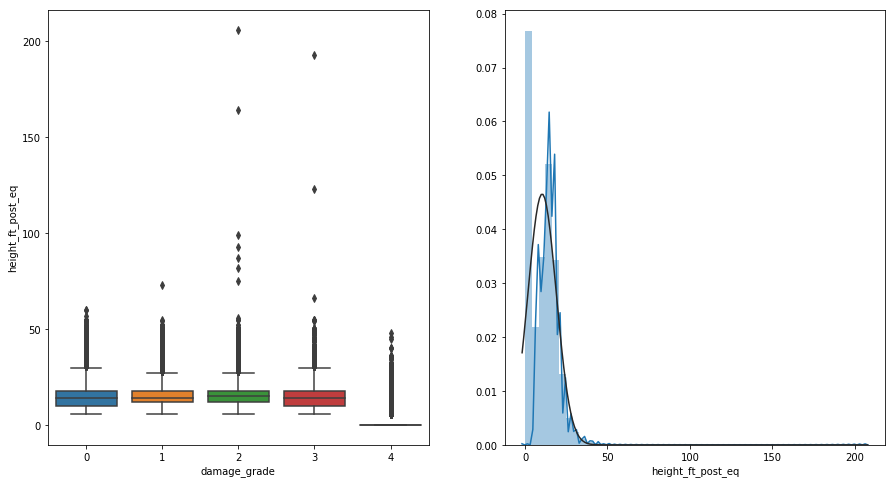

In [60]:
f, ax = plt.subplots(ncols=2, nrows=1)
print('for height post eq')
sns.boxplot(x='damage_grade', y='height_ft_post_eq', data=features, ax=ax[0])
sns.distplot(features['height_ft_post_eq'], fit=norm, ax=ax[1])

The above boxplot is saying to watch out plots b/w grade 5 and height_post

Let's delete the values with height post greator than 100

In [61]:
temp_list = features[features['height_ft_post_eq'] >=60]['building_id'].tolist()
for id in temp_list:
    features.drop(features[features['building_id'] == id].index, inplace=True)  

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Let's plot the above graph again since we have remove some of the outliers...

for height post eq


C:\Users\Aadi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


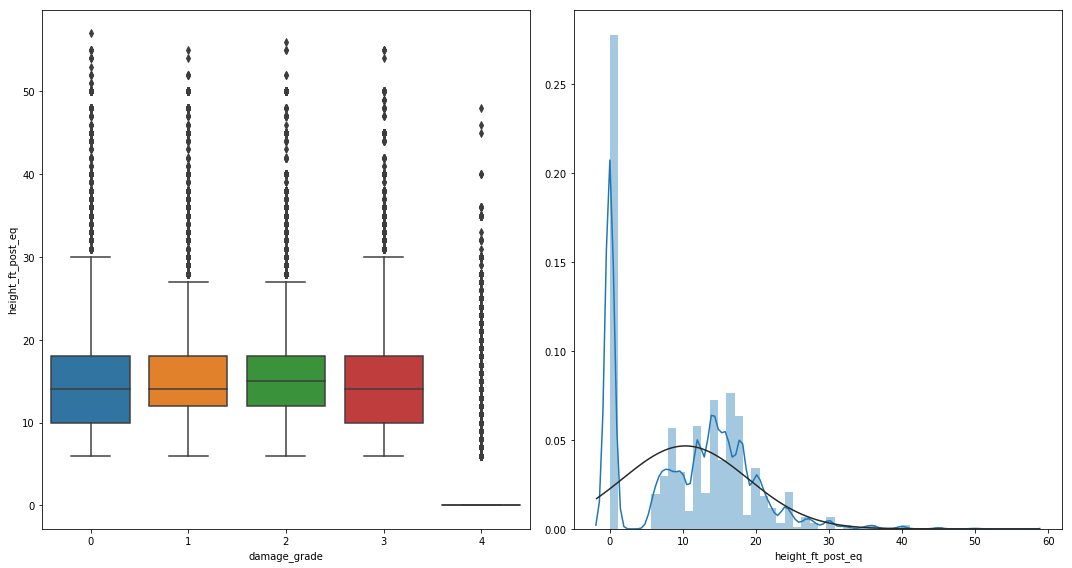

In [62]:
f, ax = plt.subplots(ncols=2, nrows=1)
print('for height post eq')
sns.boxplot(x='damage_grade', y='height_ft_post_eq', data=features, ax=ax[0])
sns.distplot(features['height_ft_post_eq'], fit=norm, ax=ax[1])
plt.tight_layout()

In [63]:
features.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'has_geotechnical_risk',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'count_floors_pre_eq', 'count_floors_post_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'height_ft_post_eq', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered', 'condition_post_eq',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'plinth_area_normal', 'height_pre_normal'],
      dtype='object')

Now, let's check out land_surface_cond, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration features by visualising them;

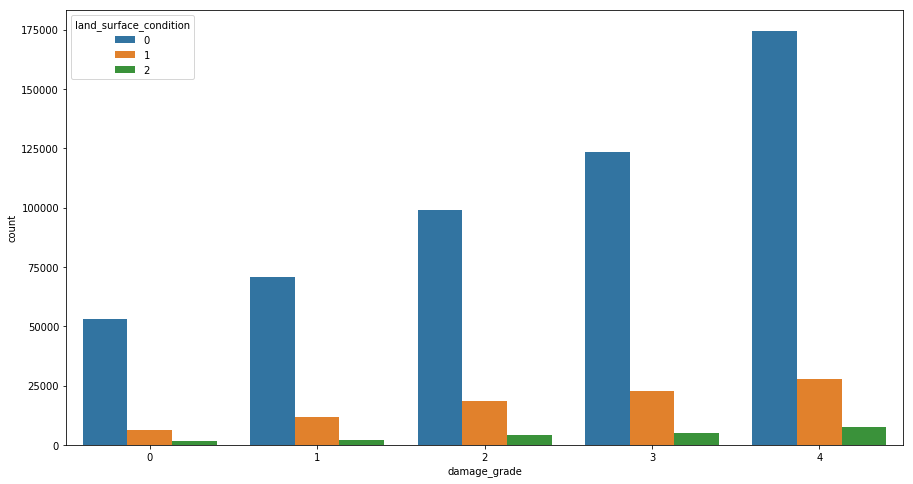

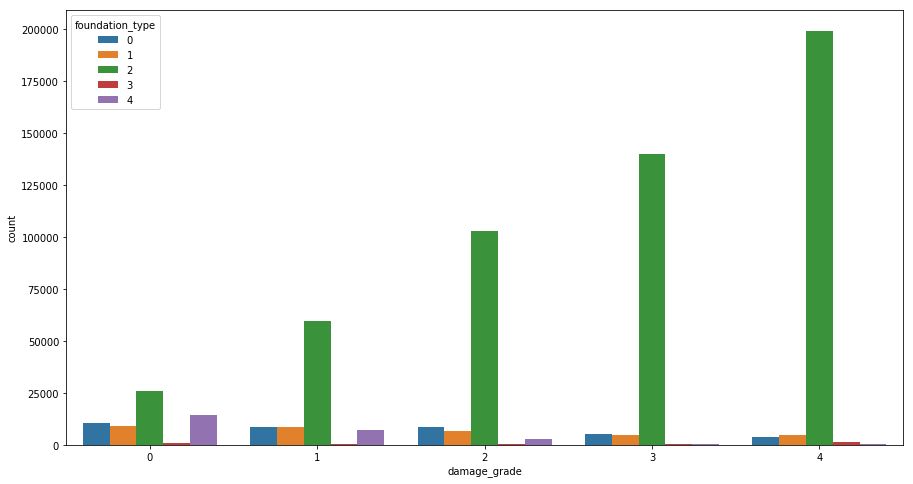

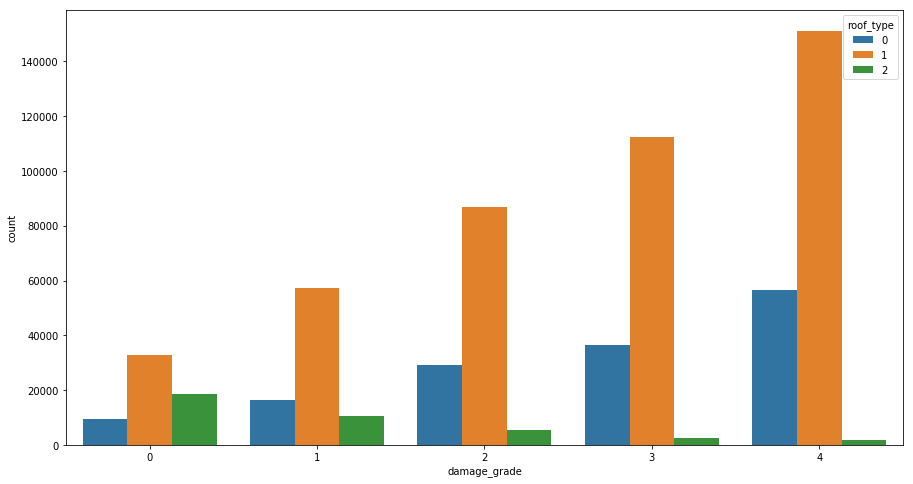

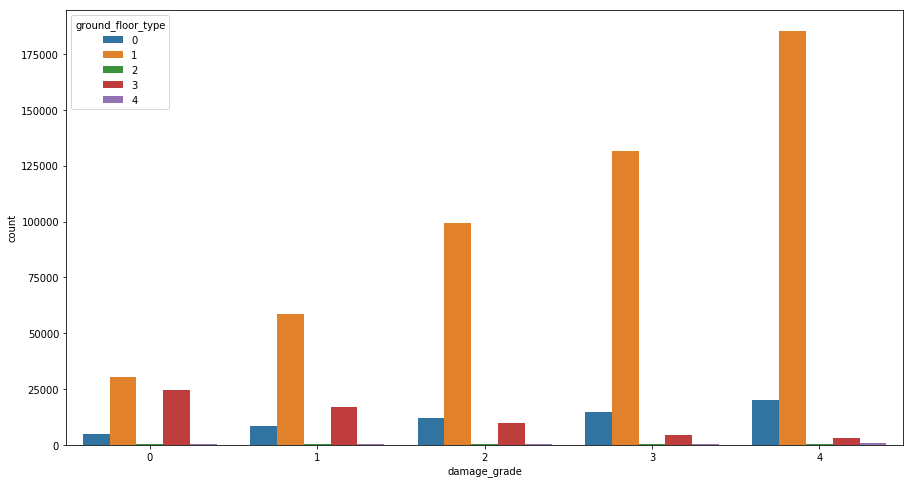

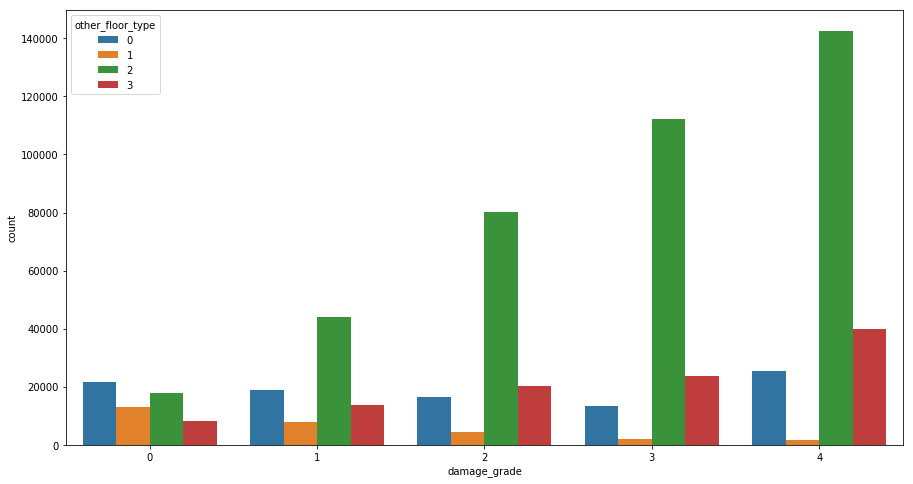

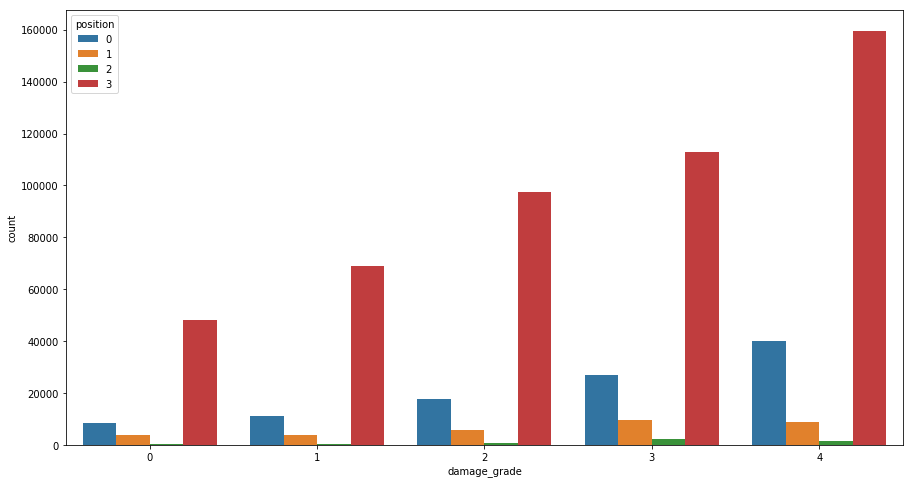

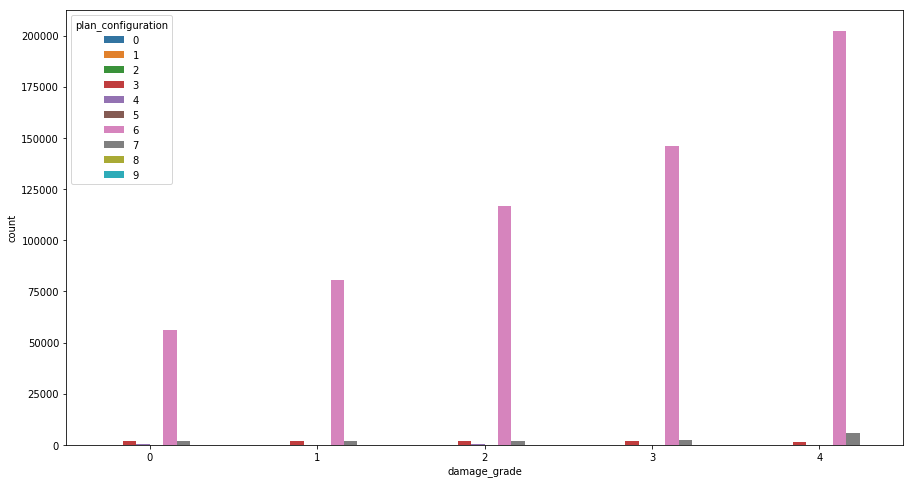

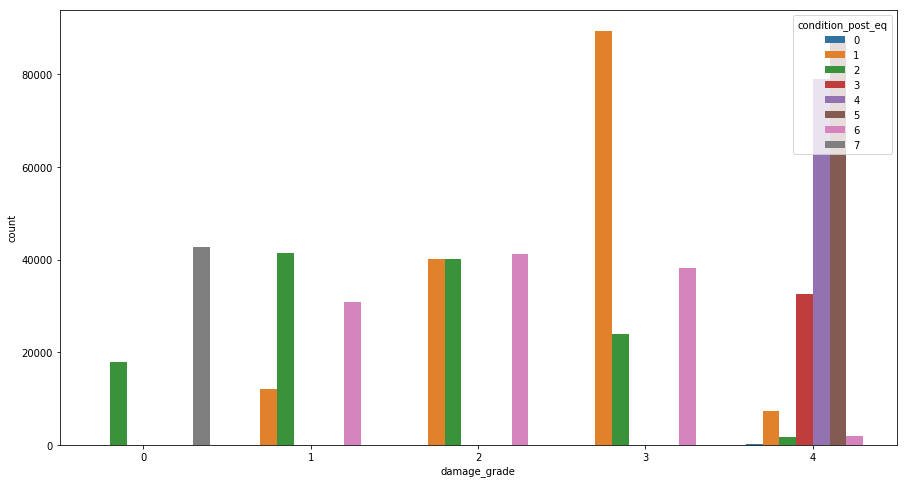

<Figure size 1080x576 with 0 Axes>

In [64]:
floor_pos_feat = ['land_surface_condition', 'foundation_type','roof_type', 'ground_floor_type', 
                  'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq']
for item in floor_pos_feat:
    sns.countplot(x='damage_grade', hue=item, data=features)
    fig = plt.figure()

By the above plots, we can delete plan configuration form our feature list. We can also delete <b> foundation type[exp], position, land_surface </b>

In [65]:
features.drop(['plan_configuration', 'land_surface_condition', 'foundation_type', 'position'], axis=1, inplace=True)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
features.isnull().sum().sort_values(ascending=False)

has_repair_started                        33138
height_pre_normal                             0
plinth_area_normal                            0
building_id                                   0
damage_grade                                  0
has_geotechnical_risk                         0
has_geotechnical_risk_landslide               0
has_geotechnical_risk_rock_fall               0
count_floors_pre_eq                           0
count_floors_post_eq                          0
age_building                                  0
plinth_area_sq_ft                             0
height_ft_pre_eq                              0
height_ft_post_eq                             0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_mud_mortar_brick     

has_repair_started has maximum number of null values,let's analyse it

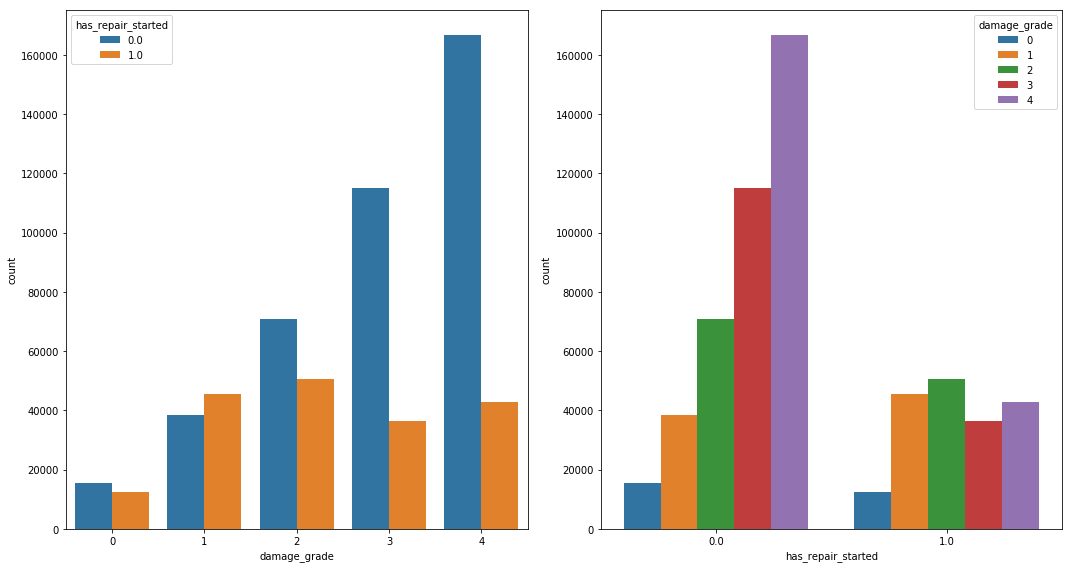

In [67]:
f, ax = plt.subplots(ncols=2, nrows=1)
sns.countplot(hue='has_repair_started', ax=ax[0],  data=features, x='damage_grade')
sns.countplot(x='has_repair_started', data=features, ax=ax[1], hue='damage_grade')
plt.tight_layout()

So, from above graph (1,1) we can say that has_repair_started could be 1 if damage_grade is below 1, and if damage grade is >=2 then repair hasn't started!

In [68]:
def fix_repair(cols):
    val = cols[0]
    label = cols[1]
    if pd.isnull(val):
        if label>=2:
            return 0
        else:
            return 1
    else:
        return val
        

In [69]:
features['has_repair_started'] = features[['has_repair_started', 'damage_grade']].apply(fix_repair, axis=1)

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
features.isnull().sum()

area_assesed                              0
building_id                               0
damage_grade                              0
has_geotechnical_risk                     0
has_geotechnical_risk_landslide           0
has_geotechnical_risk_rock_fall           0
has_repair_started                        0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_rc_non_engine

All null values are now treated, so let's make our model now! <br> First we'll try to predict without one hot encoding the categorical variables and agani we'll predict after one hot encoding...

In [71]:
features.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'has_geotechnical_risk',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'count_floors_pre_eq', 'count_floors_post_eq',
       'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq',
       'height_ft_post_eq', 'roof_type', 'ground_floor_type',
       'other_floor_type', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered', 'condition_post_eq',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'plinth_area_normal', 'height_pre_normal'],
      dtype='object')

Making another dataframe 'features_cat'(features_categories) just to perform chi square test on that particular data frame to analyse relationship in these categorical variables.

In [72]:
# To do some experimental steps!
features_cat = features.copy()
features_cat = features.iloc[:, np.r_[2:7, 13:24, 25, 26]]

In [73]:
features_cat.drop('plinth_area_normal', axis=1, inplace=True)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
features_cat.head()

,damage_grade,has_geotechnical_risk,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_repair_started,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_rc_non_engineered,condition_post_eq,has_secondary_use_agriculture
0,3,0.0,0,0,0.0,1,1,2,1,0,0,0,0,0,0,1,0
1,1,0.0,0,0,1.0,1,0,2,0,1,0,1,0,0,0,2,0
2,0,0.0,0,0,0.0,2,3,1,0,0,0,0,0,0,0,7,0
3,4,0.0,0,0,0.0,1,1,3,0,1,0,0,0,0,0,4,0
4,2,0.0,0,0,0.0,0,1,2,0,1,0,0,0,0,0,6,0


In [75]:
features_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627642 entries, 0 to 631760
Data columns (total 17 columns):
damage_grade                              627642 non-null int64
has_geotechnical_risk                     627642 non-null float64
has_geotechnical_risk_landslide           627642 non-null int64
has_geotechnical_risk_rock_fall           627642 non-null int64
has_repair_started                        627642 non-null float64
roof_type                                 627642 non-null int64
ground_floor_type                         627642 non-null int64
other_floor_type                          627642 non-null int64
has_superstructure_adobe_mud              627642 non-null int64
has_superstructure_mud_mortar_stone       627642 non-null int64
has_superstructure_stone_flag             627642 non-null int64
has_superstructure_mud_mortar_brick       627642 non-null int64
has_superstructure_cement_mortar_brick    627642 non-null int64
has_superstructure_timber                 627642 non-

In [76]:
features_cat.columns

Index(['damage_grade', 'has_geotechnical_risk',
       'has_geotechnical_risk_landslide', 'has_geotechnical_risk_rock_fall',
       'has_repair_started', 'roof_type', 'ground_floor_type',
       'other_floor_type', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered', 'condition_post_eq',
       'has_secondary_use_agriculture'],
      dtype='object')

In [77]:
features_cat.shape

(627642, 17)

In [78]:
from scipy.stats import chisquare

In [79]:
chi_test = chisquare(features_cat, axis=0)

In [81]:
for col in features_cat.columns:
    print(pd.crosstab(features_cat[col].values, features_cat['damage_grade'], rownames=[col], colnames=['damage_grade']), '\n\n')

damage_grade      0      1       2       3       4
damage_grade                                      
0             60715      0       0       0       0
1                 0  84388       0       0       0
2                 0      0  121463       0       0
3                 0      0       0  151423       0
4                 0      0       0       0  209653 


damage_grade               0      1       2       3       4
has_geotechnical_risk                                      
0.0                    56195  76653  108047  133076  175936
1.0                     4520   7735   13416   18347   33717 


damage_grade                         0      1       2       3       4
has_geotechnical_risk_landslide                                      
0                                57997  79936  114054  142008  190016
1                                 2718   4452    7409    9415   19637 


damage_grade                         0      1       2       3       4
has_geotechnical_risk_rock_fall             

In [82]:
features.drop(['has_secondary_use_agriculture', 'condition_post_eq'], axis=1, inplace=True)
features_cat.drop(['has_secondary_use_agriculture', 'condition_post_eq'], axis=1, inplace=True)


C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Let's see the relationship b/w them via chi square test

In [102]:
from scipy.stats import chi2_contingency

In [103]:
for col in features_cat.columns:
    print(col, ':')
    print('\n', chi2_contingency(pd.crosstab(features[col],features['damage_grade'])), '\n\n')

damage_grade :

 (2510568.0000000005, 0.0, 16, array([[ 5873.27047106,  8163.28005455, 11749.73319982, 14647.91624047,
        20280.8000341 ],
       [ 8163.28005455, 11346.17272904, 16330.99703971, 20359.19222104,
        28188.35795565],
       [11749.73319982, 16330.99703971, 23505.85265008, 29303.79396057,
        40572.62314982],
       [14647.91624047, 20359.19222104, 29303.79396057, 36531.85243977,
        50580.24513815],
       [20280.8000341 , 28188.35795565, 40572.62314982, 50580.24513815,
        70030.97372228]])) 


has_geotechnical_risk :

 (5023.525753619225, 0.0, 4, array([[ 53195.29844242,  73936.33937181, 106419.50975397,
        132668.89032442, 183686.96210738],
       [  7519.70155758,  10451.66062819,  15043.49024603,
         18754.10967558,  25966.03789262]])) 


has_geotechnical_risk_landslide :

 (3093.839890324627, 0.0, 4, array([[ 56494.35166066,  78521.70547541, 113019.4093018 ,
        140896.71763999, 195078.81592213],
       [  4220.64833934,   5866.29

KeyError: 'has_geotechnical_risk_rock_fall'

C:\Users\Aadi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


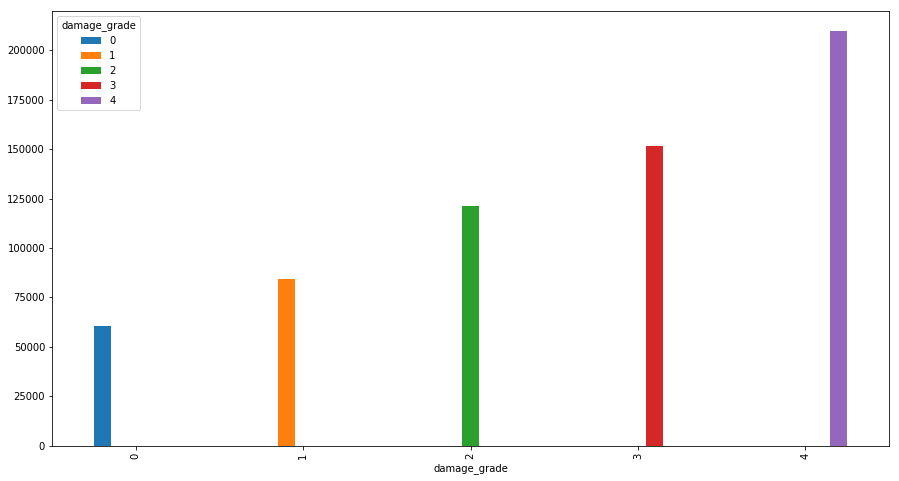

<Figure size 1080x576 with 0 Axes>

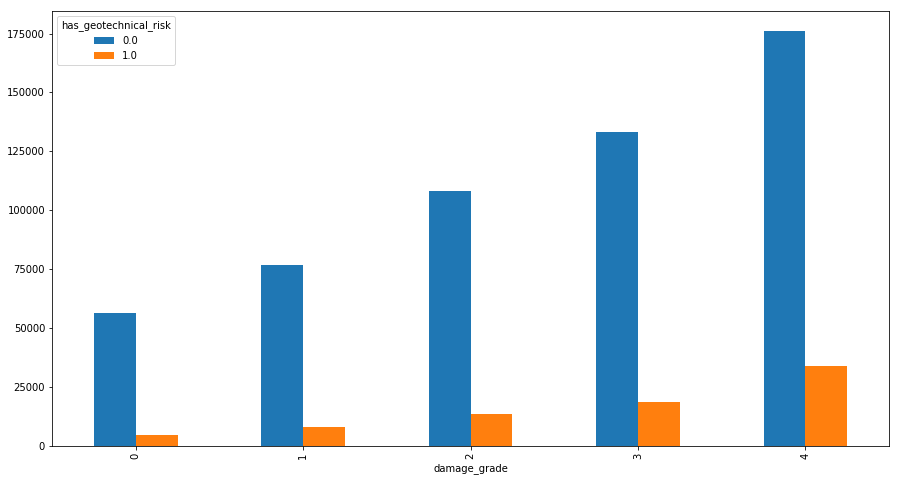

<Figure size 1080x576 with 0 Axes>

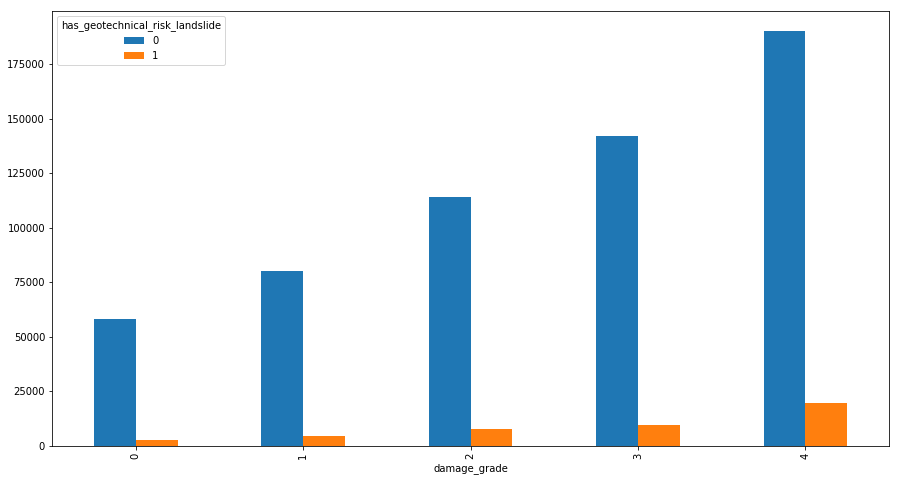

<Figure size 1080x576 with 0 Axes>

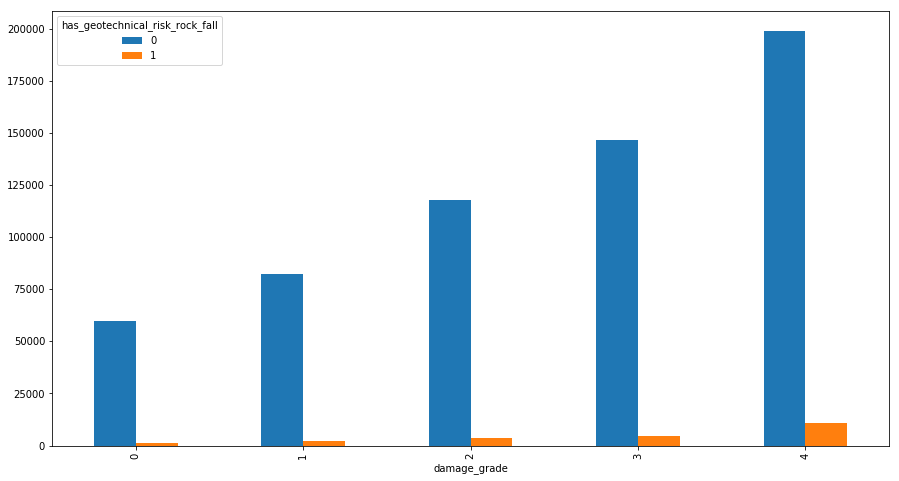

<Figure size 1080x576 with 0 Axes>

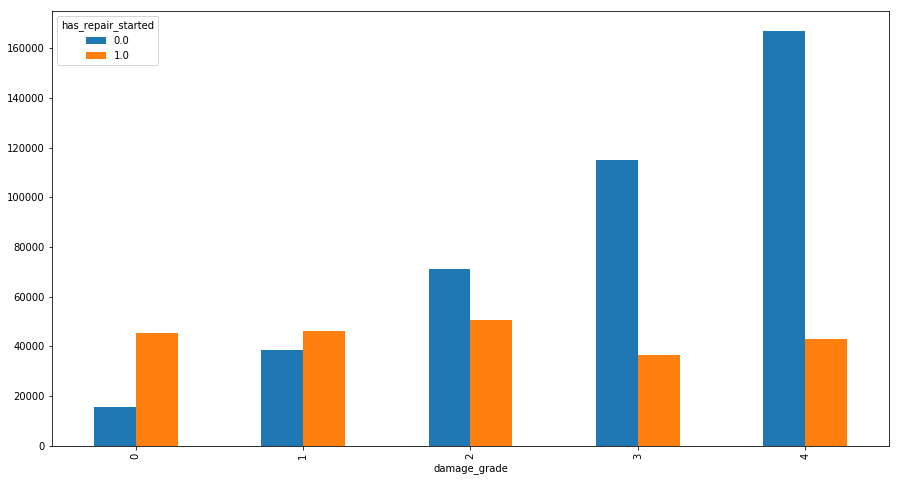

<Figure size 1080x576 with 0 Axes>

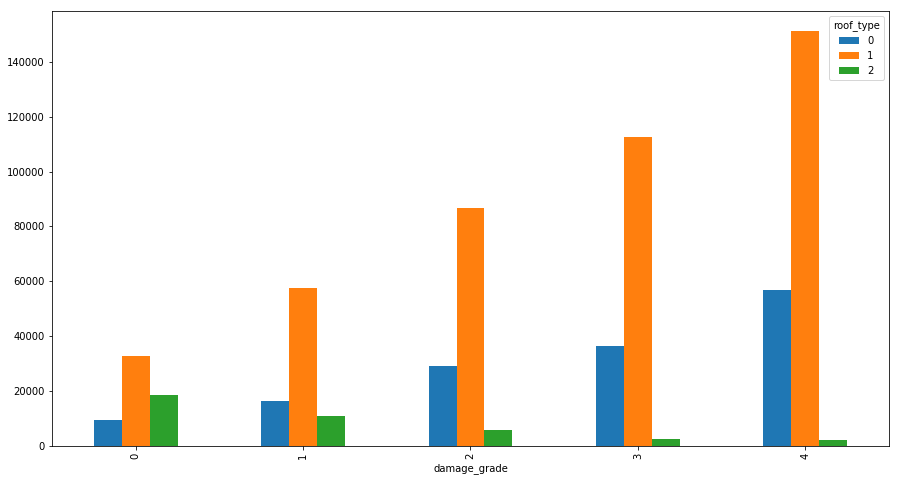

<Figure size 1080x576 with 0 Axes>

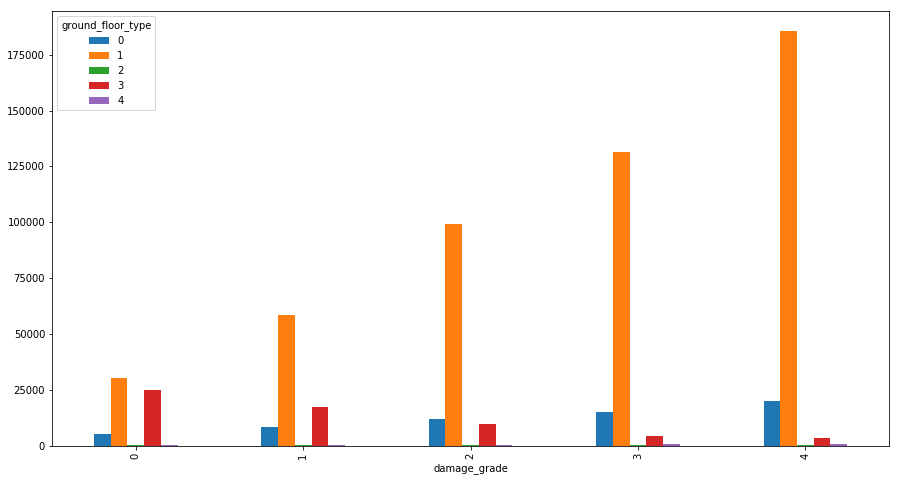

<Figure size 1080x576 with 0 Axes>

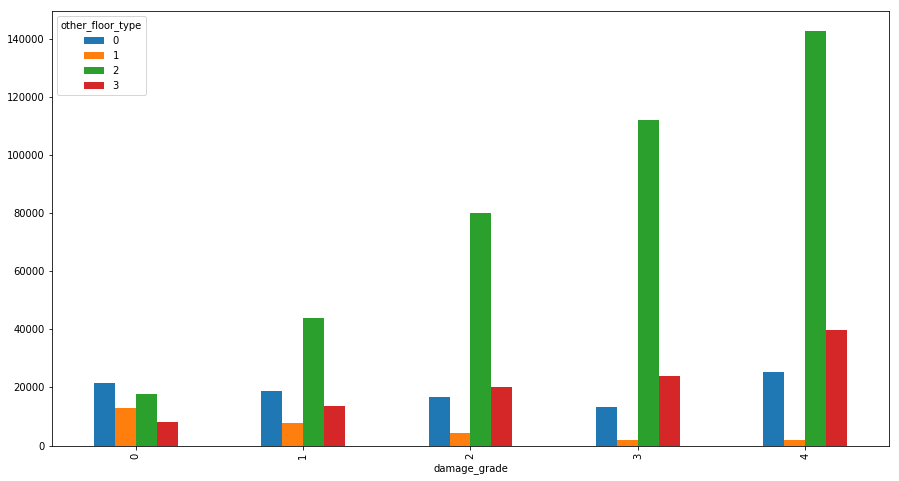

<Figure size 1080x576 with 0 Axes>

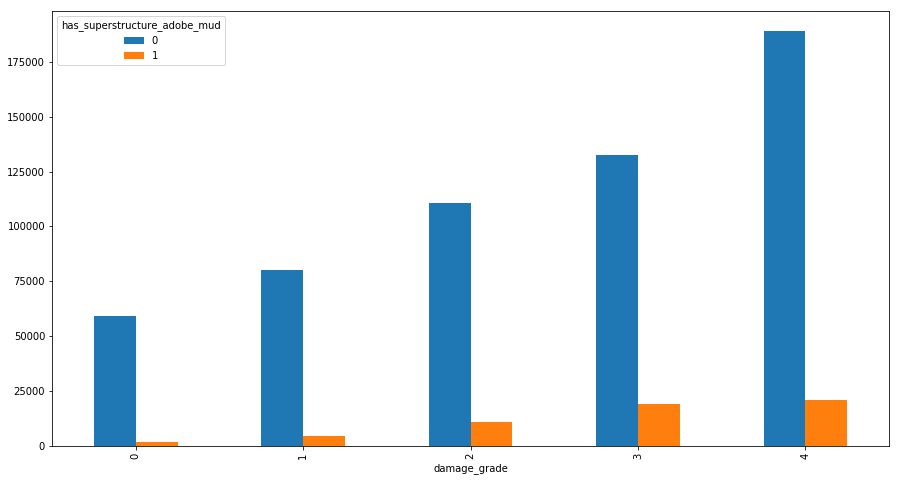

<Figure size 1080x576 with 0 Axes>

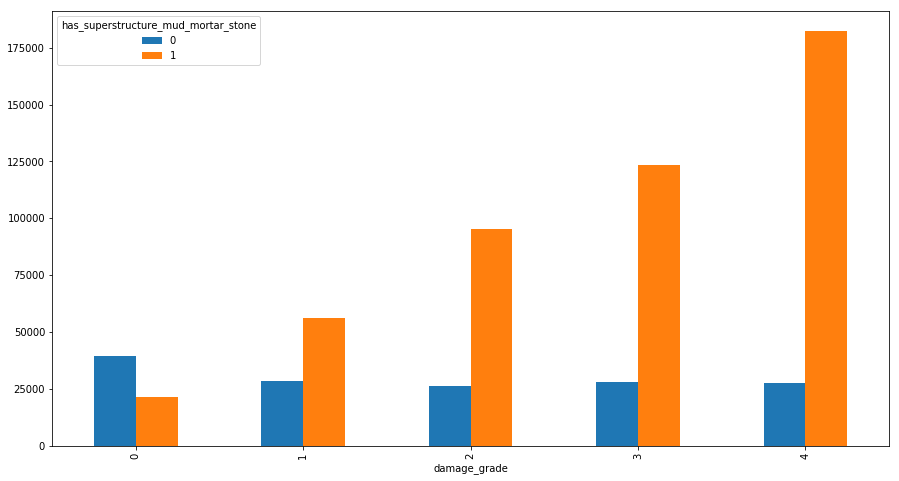

<Figure size 1080x576 with 0 Axes>

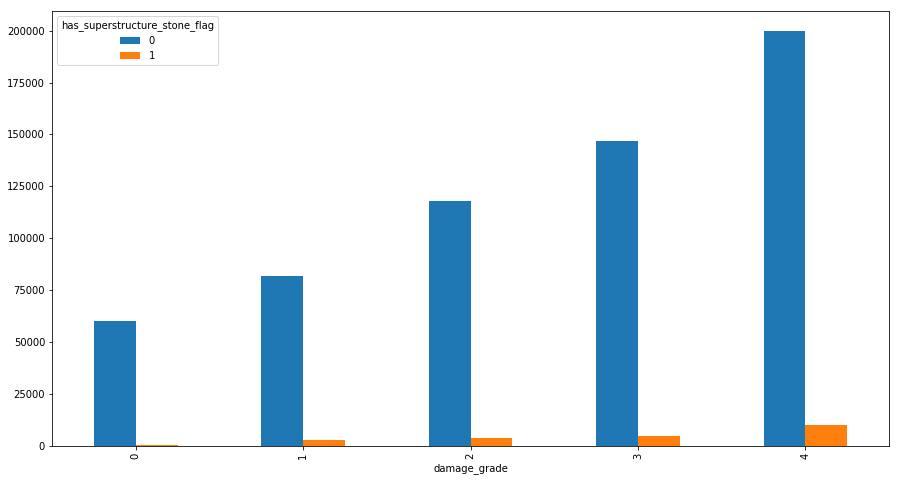

<Figure size 1080x576 with 0 Axes>

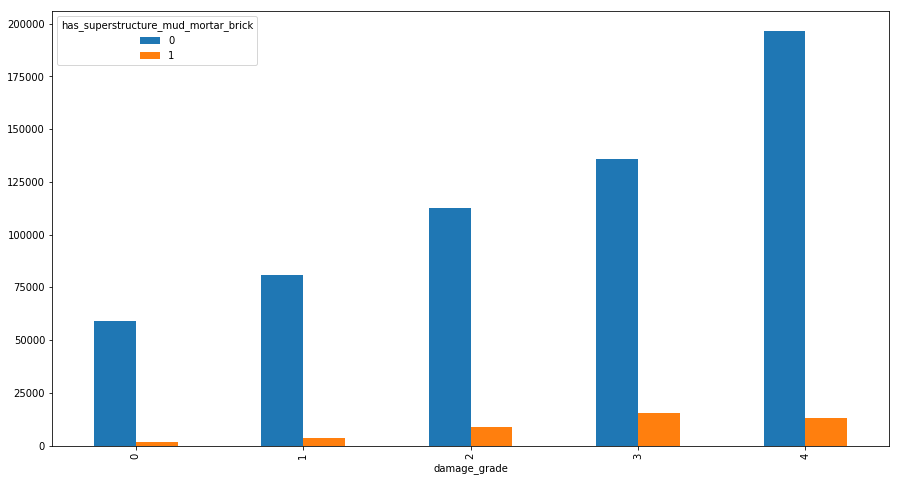

<Figure size 1080x576 with 0 Axes>

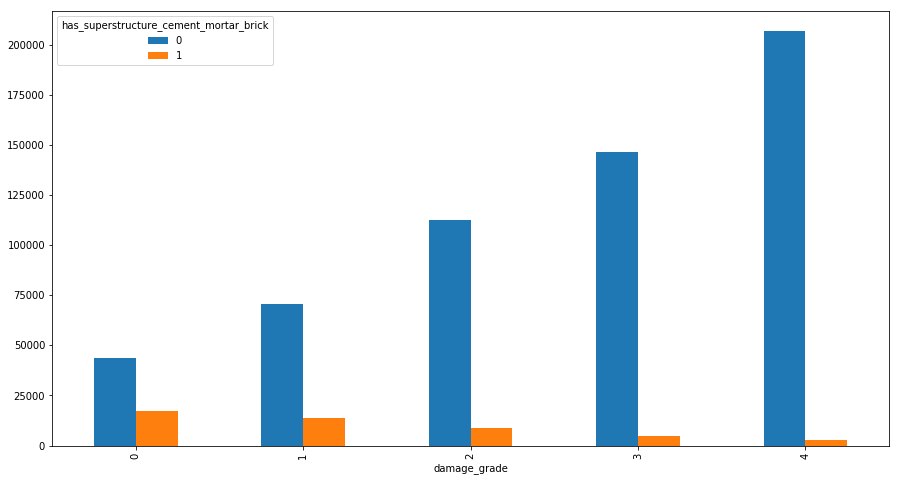

<Figure size 1080x576 with 0 Axes>

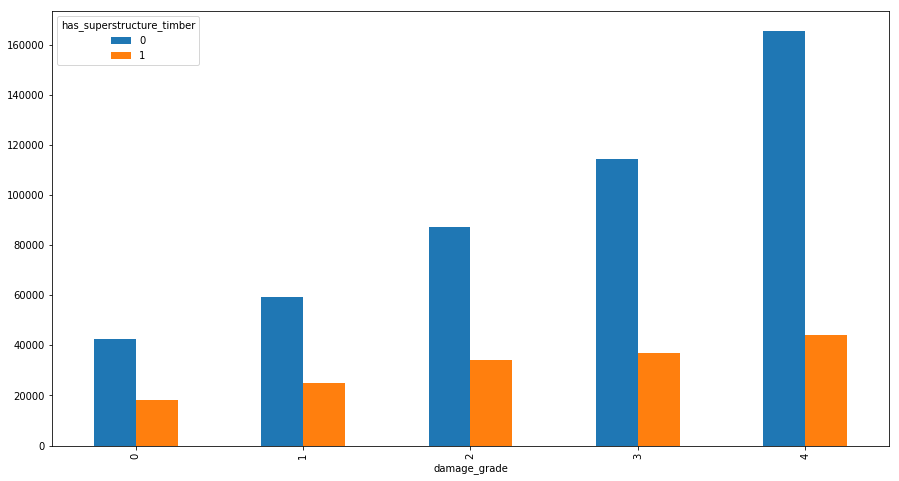

<Figure size 1080x576 with 0 Axes>

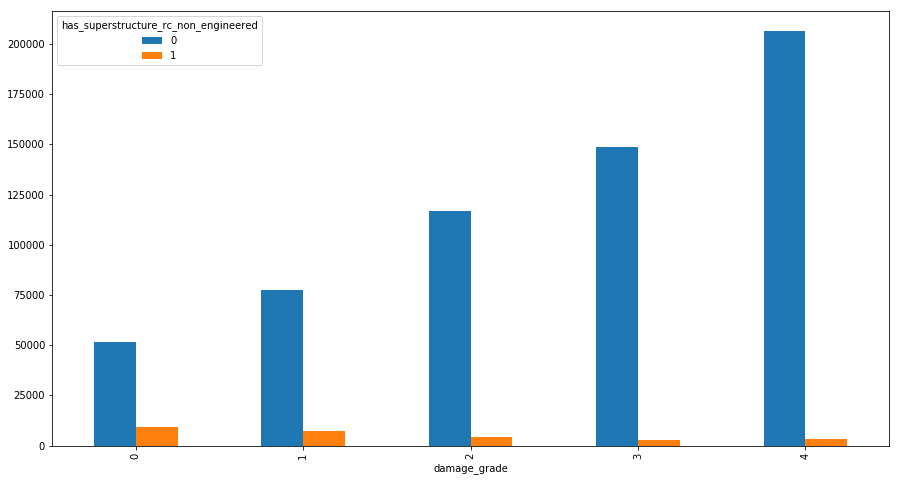

<Figure size 1080x576 with 0 Axes>

In [84]:
for col in features_cat.columns:
    pd.crosstab(features_cat['damage_grade'], features_cat[col].values, rownames=['damage_grade'], colnames=[col]).plot(kind='bar')
    fig = plt.figure()

We can see that there is high bias for one type of column, so we can delete them. Also some of the features like has_geotechnical_risk_rock_fall is not showing any particular change wrt damage grade with either 0 or 1.

If doesn't work out try removing other, 

In [86]:
features.drop(['has_geotechnical_risk_rock_fall',  'has_superstructure_stone_flag',  'ground_floor_type'], axis=1, inplace=True)
# features_cat.drop(['has_geotechnical_risk_rock_fall', 'has_superstructure_mud_mortar_brick',  'has_superstructure_stone_flag',  'ground_floor_type'], axis=1, inplace=True)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
features.columns

Index(['area_assesed', 'building_id', 'damage_grade', 'has_geotechnical_risk',
       'has_geotechnical_risk_landslide', 'has_repair_started',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'roof_type', 'other_floor_type', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered', 'has_secondary_use',
       'plinth_area_normal', 'height_pre_normal'],
      dtype='object')

In [88]:
from scipy.stats import chisquare
df_fact=features_cat.apply(lambda x : pd.factorize(x)[0])+1
df_fact_chi = pd.DataFrame([chisquare(df_fact[x].values,f_exp=df_fact.values.T,axis=1)[0] for x in df_fact])

df_fact_chi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,3752848.5,3925613.0,4038001.0,3090222.5,3.088605e+06,3.568355e+06,2.848221e+06,1338183.0,1716011.0,4042199.5,3962982.0,3965832.0,3383040.0,4044361.5
1,932579.033333,0.0,34104.0,55841.0,147286.0,2.476205e+05,1.735802e+05,3.836912e+05,251767.5,221137.0,80687.5,96993.5,95993.5,118205.0,86229.5
2,953100.333333,17052.0,0.0,30860.0,130741.0,2.340965e+05,1.514745e+05,3.763252e+05,266779.5,228535.0,48674.5,64233.5,65260.0,100355.0,54942.5
3,967536.133333,27920.5,19991.5,0.0,121434.5,2.255990e+05,1.339364e+05,3.704112e+05,275594.5,233432.0,28326.5,42895.5,44651.0,90609.0,34195.5
4,827333.433333,218817.5,219324.5,220886.5,0.0,3.145425e+05,2.391104e+05,3.908220e+05,203051.0,239578.5,219958.5,219914.5,207744.0,198752.5,212267.5
5,902079.283333,579678.0,601428.0,616611.0,528468.5,0.000000e+00,5.830981e+05,7.214638e+05,308176.5,395276.5,621525.5,616417.0,600500.5,524459.5,608669.0
6,910602.750000,347749.5,350744.5,345307.5,274887.5,3.525130e+05,0.000000e+00,3.680757e+05,281612.5,476966.5,338052.5,341867.5,227361.5,358049.5,291202.5
7,935890.016667,1186253.0,1237684.5,1267951.0,919443.0,1.140311e+06,9.848974e+05,0.000000e+00,495828.5,836810.5,1263040.5,1271091.5,1141832.5,1059816.5,1244820.5
8,625204.883333,498859.5,530923.5,550607.0,378611.5,4.560230e+05,4.850925e+05,5.068922e+05,0.0,122618.5,553538.5,556316.0,528268.0,436127.0,546693.5
9,696446.583333,421416.5,445866.5,461632.0,368326.5,4.565245e+05,5.135981e+05,5.693525e+05,75806.0,0.0,467101.5,488711.5,497626.5,383713.0,479299.0


From chi square test, features which have X(chi value) as close to zero are somewhat related and our null hypothesis(which was that the features are correlated) is true.

In [89]:
from sklearn.model_selection import train_test_split
X = features.drop(['damage_grade', 'building_id', 'plinth_area_sq_ft', 'height_ft_pre_eq'], axis=1)

y = features['damage_grade']

Let's break the data into train/test, we'll use KfoldCV later on!

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

Since it is multiclassification problem, we'll import scikit-multilearn, and LabelPowerset

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Aadi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [93]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [94]:
predictions = clf.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
print('Accuracy from RandomForest, without OneHotEncoding', accuracy_score(y_test, predictions))

Accuracy from RandomForest, without OneHotEncoding 0.6378410243609693


In [99]:
print('Accuracy from RandomForest, without OneHotEncoding', accuracy_score(y_test, predictions))

Accuracy from RandomForest, without OneHotEncoding 0.699787034037378


<b> KNN

In [93]:
knn_clf = KNeighborsClassifier(n_neighbors=35)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')

In [94]:
prediction_knn = knn_clf.predict(X_test)

In [95]:
print('Accuracy from KNNC is without OneHotEncoding', accuracy_score(y_test, prediction_knn))

Accuracy from KNNC is without OneHotEncoding 0.5478005024084804


<b>ONe vs Rest

In [97]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

- <b> RandomForest

In [98]:
onevsrest_rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=200))
onevsrest_rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [99]:
predictions_RF = onevsrest_rf.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
print('Accuracy from RandomForestClassifier(one vs rest)', accuracy_score(y_test, predictions_RF))

Accuracy from RandomForestClassifier(one vs rest) 0.6417710695564891


<h1> Let's fit our whole training set and then see the output from the real test set!

In [173]:
X.columns

Index(['area_assesed', 'has_geotechnical_risk',
       'has_geotechnical_risk_landslide', 'has_repair_started',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'height_ft_post_eq', 'roof_type', 'other_floor_type',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_rc_non_engineered', 'has_secondary_use',
       'plinth_area_normal', 'height_pre_normal'],
      dtype='object')

In [109]:
onevsrest_rf.fit(X, y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

<b> Let's clear our test data and then we'll make predictions

In [132]:
test.shape

(421175, 57)

First let's make our testing data similar in shape to that of training data.

In [137]:
test.drop(['has_geotechnical_risk_fault_crack','has_geotechnical_risk_flood', 'has_geotechnical_risk_liquefaction',
            'has_geotechnical_risk_other', 'has_geotechnical_risk_land_settlement', 'has_geotechnical_risk_liquefaction',
            'has_geotechnical_risk_other', 'has_superstructure_cement_mortar_stone','has_superstructure_bamboo',
            'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use_hotel', 
            'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 
            'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
            'has_secondary_use_use_police','has_secondary_use_other',], axis=1, inplace=True)

In [138]:
for i, v in enumerate(test.columns.tolist()):
    print(i, v)

0 area_assesed
1 building_id
2 district_id
3 has_geotechnical_risk
4 has_geotechnical_risk_landslide
5 has_geotechnical_risk_rock_fall
6 has_repair_started
7 vdcmun_id
8 district_id_x
9 vdcmun_id_x
10 ward_id_x
11 count_floors_pre_eq
12 count_floors_post_eq
13 age_building
14 plinth_area_sq_ft
15 height_ft_pre_eq
16 height_ft_post_eq
17 land_surface_condition
18 foundation_type
19 roof_type
20 ground_floor_type
21 other_floor_type
22 position
23 plan_configuration
24 has_superstructure_adobe_mud
25 has_superstructure_mud_mortar_stone
26 has_superstructure_stone_flag
27 has_superstructure_mud_mortar_brick
28 has_superstructure_cement_mortar_brick
29 has_superstructure_timber
30 has_superstructure_rc_non_engineered
31 condition_post_eq
32 district_id_y
33 vdcmun_id_y
34 ward_id_y
35 legal_ownership_status
36 count_families
37 has_secondary_use
38 has_secondary_use_agriculture


In [139]:
test_features = test.iloc[:, np.r_[0, 1, 3:7, 11:32, 37, 38]]

In [145]:
for i, v in enumerate(test_features.columns.tolist()):
    print(i, v)

0 area_assesed
1 building_id
2 has_geotechnical_risk
3 has_geotechnical_risk_landslide
4 has_geotechnical_risk_rock_fall
5 has_repair_started
6 count_floors_pre_eq
7 count_floors_post_eq
8 age_building
9 plinth_area_sq_ft
10 height_ft_pre_eq
11 height_ft_post_eq
12 roof_type
13 ground_floor_type
14 other_floor_type
15 has_superstructure_adobe_mud
16 has_superstructure_mud_mortar_stone
17 has_superstructure_stone_flag
18 has_superstructure_mud_mortar_brick
19 has_superstructure_cement_mortar_brick
20 has_superstructure_timber
21 has_superstructure_rc_non_engineered
22 has_secondary_use


In [141]:
test_features.drop(['plan_configuration', 'land_surface_condition', 'foundation_type', 'position', 'has_secondary_use_agriculture', 'condition_post_eq'], axis=1, inplace=True)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [149]:
test_features.drop(['has_superstructure_stone_flag', 'ground_floor_type', 'has_geotechnical_risk_rock_fall'], axis=1, inplace=True)

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [151]:
for i, v in enumerate(test_features.columns):
    print(i, v)

0 area_assesed
1 building_id
2 has_geotechnical_risk
3 has_geotechnical_risk_landslide
4 has_repair_started
5 count_floors_pre_eq
6 count_floors_post_eq
7 age_building
8 plinth_area_sq_ft
9 height_ft_pre_eq
10 height_ft_post_eq
11 roof_type
12 other_floor_type
13 has_superstructure_adobe_mud
14 has_superstructure_mud_mortar_stone
15 has_superstructure_mud_mortar_brick
16 has_superstructure_cement_mortar_brick
17 has_superstructure_timber
18 has_superstructure_rc_non_engineered
19 has_secondary_use


In [156]:
obj_vars = test_features.iloc[:,np.r_[0, 11, 12]]
objToNumCat = obj_vars.apply(LabelEncoder().fit_transform)
test_features.iloc[:, np.r_[0, 11, 12]] = objToNumCat

C:\Users\Aadi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [159]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 20 columns):
area_assesed                              421175 non-null int64
building_id                               421175 non-null object
has_geotechnical_risk                     421175 non-null float64
has_geotechnical_risk_landslide           421175 non-null int64
has_repair_started                        399253 non-null float64
count_floors_pre_eq                       421175 non-null int64
count_floors_post_eq                      421175 non-null int64
age_building                              421175 non-null int64
plinth_area_sq_ft                         421175 non-null int64
height_ft_pre_eq                          421175 non-null int64
height_ft_post_eq                         421175 non-null int64
roof_type                                 421175 non-null int64
other_floor_type                          421175 non-null int64
has_superstructure_adobe_mud              421175 non

In [162]:
test_features['plinth_area_normal'] = np.log(test_features['plinth_area_sq_ft'])

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
log_pre_ht = np.log(test_features['height_ft_pre_eq']+1)
test_features['height_pre_normal'] = log_pre_ht

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
test_features.isnull().sum().sort_values(ascending=False)

has_repair_started                        21922
height_pre_normal                             0
plinth_area_normal                            0
building_id                                   0
has_geotechnical_risk                         0
has_geotechnical_risk_landslide               0
count_floors_pre_eq                           0
count_floors_post_eq                          0
age_building                                  0
plinth_area_sq_ft                             0
height_ft_pre_eq                              0
height_ft_post_eq                             0
roof_type                                     0
other_floor_type                              0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber                     0
has_superstructure_rc_non_engineered          0
has_secondary_use                       

Let's fix the repair null values!

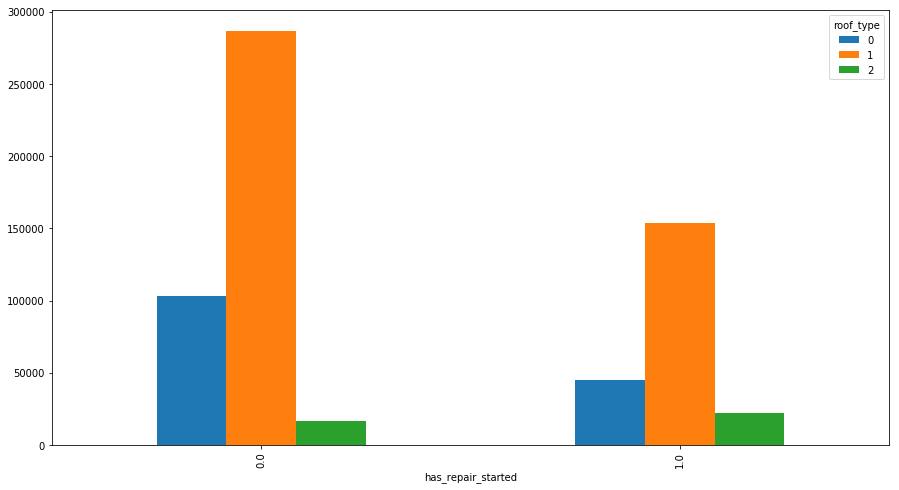

In [169]:
pd.crosstab(features_cat['has_repair_started'], features_cat['roof_type'].values, rownames=['has_repair_started'], colnames=['roof_type']).plot(kind='bar')

We can say that if roof type is of type 0 then repair_has_not_started and if roof type is of type 2, then repair has started!

In [170]:
def fix_repair_test(cols):
    repair = cols[0]
    roof_type = cols[1]
    
    if pd.isnull(repair):
        if roof_type == 0:
            return 0
        elif roof_type== 2:
            return 1
        else:
            return 0
    else:
        return repair  

In [171]:
test_features['has_repair_started'] = test_features[['has_repair_started', 'roof_type']].apply(fix_repair_test, axis=1)

C:\Users\Aadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
test_features.isnull().sum().sort_values(ascending=False)

height_pre_normal                         0
plinth_area_normal                        0
building_id                               0
has_geotechnical_risk                     0
has_geotechnical_risk_landslide           0
has_repair_started                        0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
roof_type                                 0
other_floor_type                          0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_rc_non_engineered      0
has_secondary_use                         0
area_assesed                              0
dtype: int64

No, Null values now, let's just finalize our data then we'll make predicitons on this test data!

In [190]:
for i, v in enumerate(test_features.columns):
    print(i, v)

0 area_assesed
1 building_id
2 has_geotechnical_risk
3 has_geotechnical_risk_landslide
4 has_repair_started
5 count_floors_pre_eq
6 count_floors_post_eq
7 age_building
8 plinth_area_sq_ft
9 height_ft_pre_eq
10 height_ft_post_eq
11 roof_type
12 other_floor_type
13 has_superstructure_adobe_mud
14 has_superstructure_mud_mortar_stone
15 has_superstructure_mud_mortar_brick
16 has_superstructure_cement_mortar_brick
17 has_superstructure_timber
18 has_superstructure_rc_non_engineered
19 has_secondary_use
20 plinth_area_normal
21 height_pre_normal


In [191]:
testing_data = test_features.iloc[:, np.r_[0, 2:8, 10, 11:21, 21]]

In [193]:
for i, v in enumerate(testing_data.columns):
    print(i,v)

0 area_assesed
1 has_geotechnical_risk
2 has_geotechnical_risk_landslide
3 has_repair_started
4 count_floors_pre_eq
5 count_floors_post_eq
6 age_building
7 height_ft_post_eq
8 roof_type
9 other_floor_type
10 has_superstructure_adobe_mud
11 has_superstructure_mud_mortar_stone
12 has_superstructure_mud_mortar_brick
13 has_superstructure_cement_mortar_brick
14 has_superstructure_timber
15 has_superstructure_rc_non_engineered
16 has_secondary_use
17 plinth_area_normal
18 height_pre_normal


<b> Predicting...</b>

In [197]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [198]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=150))
ovr_clf.fit(X, y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [199]:
classifier_200 = RandomForestClassifier(n_estimators=200)
classifier_200.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Predictions**

In [200]:
prediction_150 = classifier.predict(testing_data)
prediction_ovr = ovr_clf.predict(testing_data)
prediction_200 = classifier_200.predict(testing_data)

In [202]:
prediction_150

array([3, 4, 4, ..., 0, 4, 4], dtype=int64)

In [203]:
prediction_ovr

array([3, 4, 4, ..., 0, 4, 4], dtype=int64)

In [204]:
prediction_200

array([3, 4, 4, ..., 0, 4, 4], dtype=int64)

In [205]:
len(prediction_150)

421175

In [206]:
len(prediction_200)

421175

**Exporting to pdf for submission!**

In [210]:
def numToGrade(value):
    if value == 0:
        return 'Grade 1'
    elif value == 1:
        return 'Grade 2'
    elif value == 2:
        return 'Grade 3'
    elif value == 3:
        return 'Grade 4'
    elif value == 4:
        return 'Grade 5'

In [237]:
prediction_df = pd.DataFrame({'building_id': test['building_id'], 'damage_grade': prediction_ovr})

In [238]:
prediction_df.head()

,building_id,damage_grade
0,a3380c4f75,3
1,a338a4e653,4
2,a338a4e6b7,4
3,a33a6eaa3a,3
4,a33b073ff6,4


In [239]:
prediction_dfcp = prediction_df.copy()

In [240]:
prediction_dfcp['damage_grade'] = prediction_dfcp['damage_grade'].apply(numToGrade)

In [241]:
prediction_dfcp.head()

,building_id,damage_grade
0,a3380c4f75,Grade 4
1,a338a4e653,Grade 5
2,a338a4e6b7,Grade 5
3,a33a6eaa3a,Grade 4
4,a33b073ff6,Grade 5


In [242]:
submission_cp.to_csv('predictions.csv', index=False)

---

Rough work ahead!

In [118]:
# idcollist = features[(features['count_floors_pre_eq']>=6 )| (features['count_floors_post_eq']>=6 )]['building_id'].tolist()
# len(idcollist)
# for id in idcollist:
#     features.drop(features[features['building_id']==id].index, inplace=True)

In [ ]:
# knn_clf = LabelPowerset(KNeighborsClassifier(n_neighbors=35))
# knn_clf.fit(X_train, y_train)

In [609]:
prediction_knn = knn_clf.predict(X_test)

In [610]:
print('Accuracy from KNNC is without OneHotEncoding', accuracy_score(y_test, prediction_knn))

Accuracy from KNNC is without OneHotEncoding 0.6817884892162747


In [626]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=np.r_[0, 9:11, 19].tolist())
X_ohe = onehotencoder.fit_transform(X).toarray()

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [614]:
knn_clf.fit(X_train, y_train)

LabelPowerset(classifier=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform'),
       require_dense=[True, True])

In [616]:
prediction_knn_ohe = knn_clf.predict(X_test)

In [617]:
print('Accuracy from KNNC is with OneHotEncoding', accuracy_score(y_test, prediction_knn_ohe))

Accuracy from KNNC is with OneHotEncoding 0.6864992325790125
